## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [1]:
# Put your imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [2]:
data_folder = 'data/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

## Prelude & Introduction to the Dataset
This dataset expands on my earlier New York City Census Data dataset. It includes data from the entire country instead of just New York City. The expanded data will allow for much more interesting analyses and will also be much more useful at supporting other data sets. The data here are taken from the DP03 and DP05 tables of the 2015 American Community Survey 5-year estimates. The full datasets on the American Factfinder website.
During this first taks of the hoemwork, we asre please to take any person that reads these lines across an interesting journey through the American Counties. 


In [3]:
# Load the files 
df_census_tract = pd.read_csv(f'{data_folder}acs2015_census_tract_data.csv')
df_census_tract.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [4]:
# Load the files 
df_county = pd.read_csv(f'{data_folder}acs2015_county_data.csv')
df_county.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


**COMMENT** : The two files have the same structure. The only difference between the two tables is the name of the **id** column, *CensusTract* and, respectively, *CensusId*. Just as a small piece of information: counties are political subdivisions of States in the US, and the boundaries of some have been set centuries ago. In contrast, Census tracts are defined by the census bureau and have a much more consistent size based on the number of inhabitants. A typical census tract has about 5000 residents. Therefore, we decided to use in priority the census tract file which seems to have more relevant information. 

### 1.A : Determine & Quantify the dependency

In [5]:
# Choose the 2 features of interest
df_county_dependency = df_county[['SelfEmployed', 'IncomePerCap']]

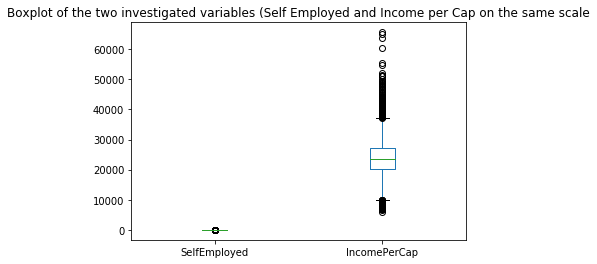

In [8]:
# Plot to find the relation
df_county_dependency.plot.box()
plt.title('Boxplot of the two investigated variables (Self Employed and Income per Cap on the same scale')
plt.show()

### Zoom the individual repartition of the data 

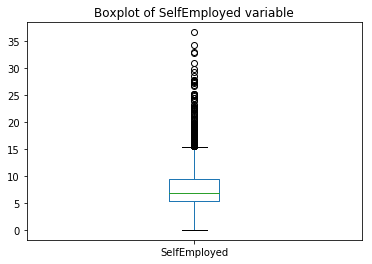

In [10]:
df_county_dependency['SelfEmployed'].plot.box()
plt.title('Boxplot of SelfEmployed variable')
plt.show()

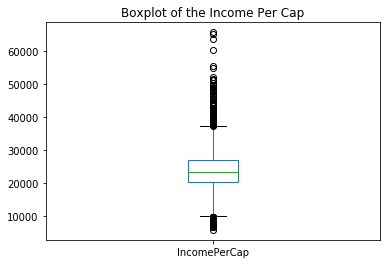

In [11]:
df_county_dependency['IncomePerCap'].plot.box()
plt.title('Boxplot of the Income Per Cap')
plt.show()

**COMMENT**: We decided to make a boxplot from the start in order to have a broad idea about the underlying distribution of our two features. Indeed, in order to know which precaution we had to take with the data a boxplot is a nice tool in order to get a rapid first impression. As we can see, we are once again in a case where the data contains many of outliers. The boxplots show that the two variables have different orders of magnitude. Indeed, the median income per cap is around 22000 whereas the self-employement is around 6. 
Nevertheless, by looking at each distribution independently, we found that the way the data is distributed is similar between both features (in a different scale, as mentionned above).

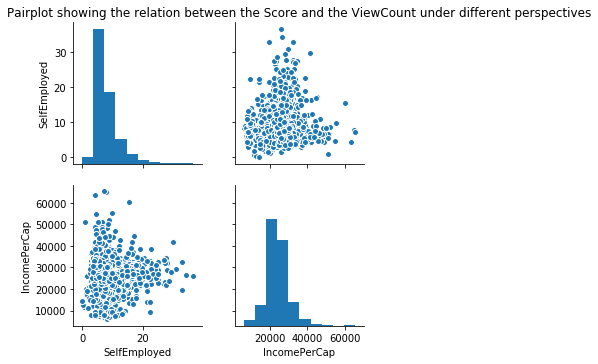

In [12]:
sns.pairplot(df_county_dependency)
plt.title('Pairplot showing the relation between the Score and the ViewCount under different perspectives')
plt.show()

**COMMENT**:
The pairplot (or paired scatter plot to be more general) makes it possible to asses a potential linear correlation between two variables. As we can see from the plot, there no obvious linear relationship between the variables at the first sight since we do not see that the points are distributed closely around the x = y line. As already shown in the boxplot, we can see that the major part of the data is distributed in the bell formed disribution for boths variables. However, it seems that there are a few outliers. These outliers are visualized on the next plot bellow in red.

#### Define how Outliers are Determined in Statistics
Outliers are statistically determined by adding or substracting the first quantile and the third quantile by 1.5 (weak outliers) or 3.0 (strong outliers) the interquartile range (IQR). If we subtract 3 x IQR from the first quartile, any data values that are less than this number are considered **strong outliers**. Similarly, if we add 3 x IQR to the third quartile, any data values that are greater than this number are considered as **strong outliers**.

In [10]:
def remove_outlier(df):
    IQR = df.describe()['IncomePerCap']['75%'] - df.describe()['IncomePerCap']['25%']
    low_outlier = max(0, df.describe()['IncomePerCap']['25%'] - 3*IQR)
    high_outlier = df.describe()['IncomePerCap']['75%'] + 3*IQR 

    print( f'The data point is considered as being an outlier if it is outside of this interval: [ {low_outlier} , {high_outlier}]')

    df_no_outliers = df[df.IncomePerCap < high_outlier]
    df_out_outliers = df[df.IncomePerCap > high_outlier]
    ax =  df_no_outliers.plot.scatter(x='SelfEmployed', y='IncomePerCap', label = 'IncomePerCap')
    df_out_outliers.plot.scatter(x='SelfEmployed', y='IncomePerCap', ax=ax, color='red', label = 'IncomePerCap - Outlier')
    plt.title('2D Scatter showing the SelfEmployed in function of the IncomePerCap on regular axis')
    plt.show()
    return df_no_outliers

In [11]:
color = ["red", "blue", "green"]
def analysis_per_state(list_Set, df_county):
    for j, i in enumerate (list_Set) :
        df_county_selected = pd.DataFrame()
        if i == 'overall': 
            df_county_selected = df_county
            plt.scatter(df_county_selected.SelfEmployed, df_county_selected.IncomePerCap, s=4, c=[(0.0, 0.0, 0.5, 1.0)])
        elif len(i) == 3:
            df_county_selected = df_county.loc[(df_county.State == i[0]) | (df_county.State == i[1]) | (df_county.State == i[2]), ['SelfEmployed', 'IncomePerCap']]
            plt.scatter(df_county_selected.SelfEmployed, df_county_selected.IncomePerCap, s=4, c=[(0.0, 0.0, 0.5, 1.0)])
        else :
            df_county_selected = df_county.loc[(df_county.State == i), ['SelfEmployed', 'IncomePerCap']]
            plt.scatter(df_county_selected.SelfEmployed, df_county_selected.IncomePerCap, s=4, color = color[j], label = i)
        
        a, b, rVal, pVal, stdErr = sc.stats.linregress(df_county_selected.SelfEmployed, df_county_selected.IncomePerCap)
        xLin = np.array([df_county_selected.SelfEmployed.min(), df_county_selected.SelfEmployed.max()])
        yLin = a * xLin + b
        # We gather plot the distribution of Scores depending on the viewCount
        plt.rcParams["figure.figsize"] = [13,7]
        plt.plot(xLin, yLin, color = color[j])
        plt.text(xLin[1]*0.8, yLin[1], "r={:.4f}".format(rVal), color = color[j])
        plt.xlabel("SelfEmployed", fontsize=14)
        plt.ylabel("IncomePerCap", fontsize=14)
        plt.legend()
        plt.title(f'Scatter plot for the state {i} of the IncomePerCap in function of SelfEmployed with linear regression')

    plt.show()
    return df_county_selected

In [12]:
import random
def bootstrapping(distribution, percentage, number_of_bootstrapping):
    '''
    Allows the random sampling with repacement of the distribution given as input and return a list of correlation corresponding to each resampling experiment.
    Inputs :
        - distribution : List of integer corresponding to the response time.
        - percentage : Float number corresponding to the percentage of the dataset you want to resample. It define indirectly the resample size.
        - number_of_bootstrapping : Integer number corresponding to number of resampling we will do.
    Output :
        - pearson_list, spearman_list: List of float number where each element correspond to the correlation of one type of one experience of resampling. 
    '''
    pearson_list, spearman_list = [], []
    for i in range (number_of_bootstrapping) :
        # Create an array of random numbers allowing us to select random index
        random_tab = random.sample(range(int(distribution.index.min()),int(distribution.index.max())), int(np.round(distribution.shape[0]*percentage)))
        # Adding to a list the mean of the sample of the distribution
        pearson_list.append(distribution[distribution.index.isin(random_tab)].corr(method='pearson')['SelfEmployed'][1])
        spearman_list.append(distribution[distribution.index.isin(random_tab)].corr(method='spearman')['SelfEmployed'][1])
    return pearson_list, spearman_list

#### Plot the outliers

The data point is considered as being an outlier if it is outside of this interval: [ 0 , 47497.5]


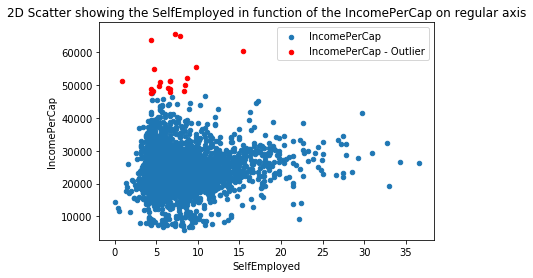

In [13]:
df_county_dependency_no_outliers = remove_outlier(df_county_dependency)

Plot with outliers :


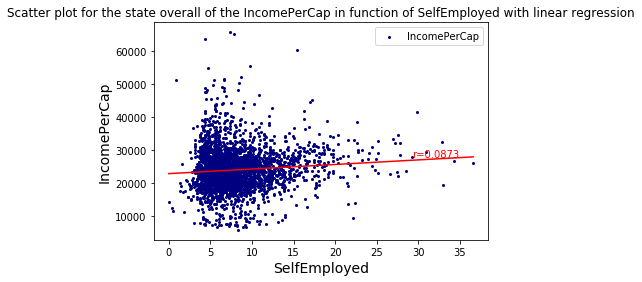

Plot after removing ouliers :


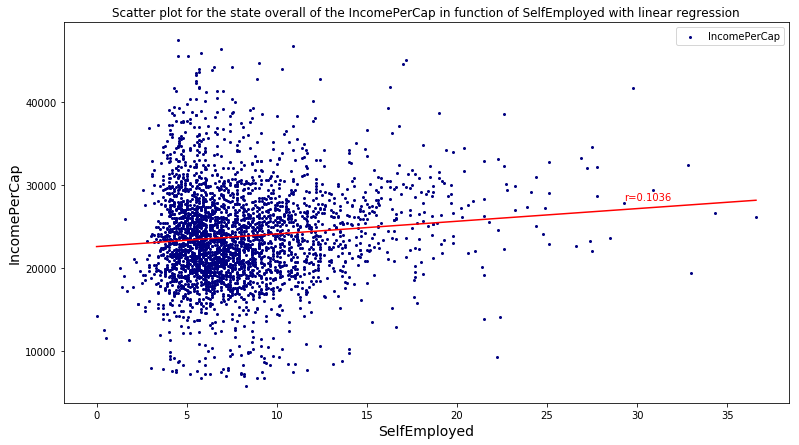

In [14]:
print(f'Plot with outliers :')
selected_df = analysis_per_state(['overall'], df_county_dependency)
print(f'Plot after removing ouliers :')
selected_df = analysis_per_state(['overall'], df_county_dependency_no_outliers)

Text(0.5,1,'Lag plot showing the SelfEmployed in function of the IncomePerCap')

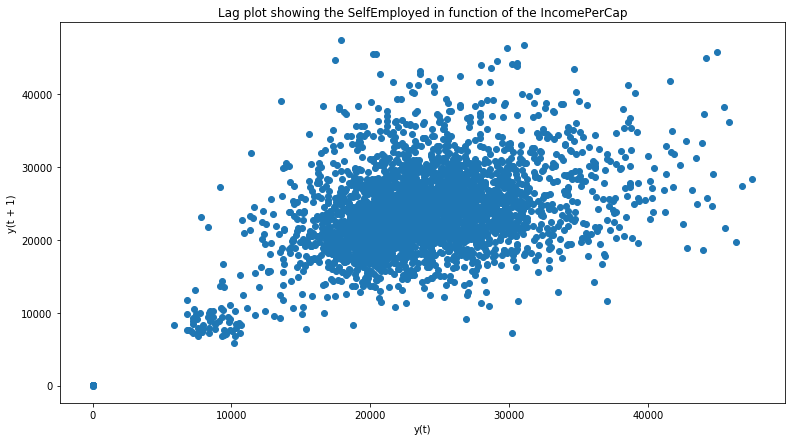

In [15]:
pd.plotting.lag_plot(df_county_dependency_no_outliers)
plt.title('Lag plot showing the SelfEmployed in function of the IncomePerCap')

**COMMENT** : we decided to use Lag plots to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot and spread all over the plot at random position. Non-random structures imply that the underlying data are not random. 
In this case, we cannot see that the data is spread all over the domain since there is few data in the top left and in bottom right corners. However, the data spread fairly largely and thus seems to be closer to a random distribution than to a linear or non-linear relation. Nevertheless, in order to be sure we will perform a Pearson and Spearman correlation test in order to have objective proof of the previous observation. 

### Determination of the Pearson (linear relation) and Spearman (non-linear relation) coefficients 

Pearson correlation coefficient with outliers:               SelfEmployed  IncomePerCap
SelfEmployed      1.000000      0.087274
IncomePerCap      0.087274      1.000000
Spearman correlation coefficient with outliers:               SelfEmployed  IncomePerCap
SelfEmployed      1.000000      0.056414
IncomePerCap      0.056414      1.000000
Pearson correlation coefficient without outliers:               SelfEmployed  IncomePerCap
SelfEmployed      1.000000      0.103558
IncomePerCap      0.103558      1.000000
Spearman correlation coefficient without outliers:               SelfEmployed  IncomePerCap
SelfEmployed      1.000000      0.060451
IncomePerCap      0.060451      1.000000


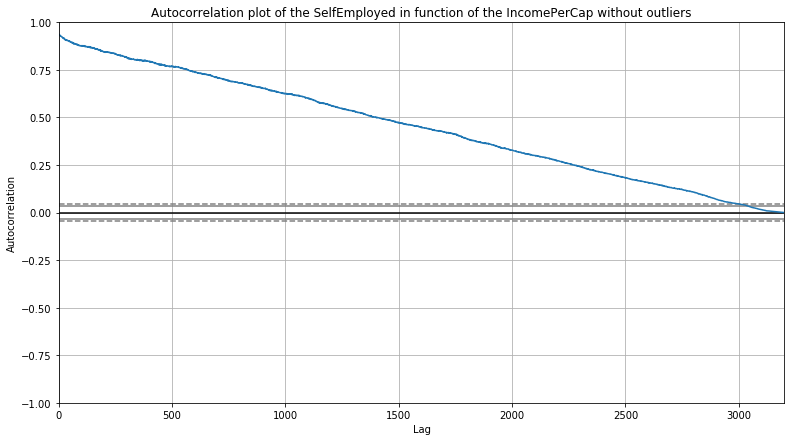

In [16]:
pd.plotting.autocorrelation_plot(df_county_dependency_no_outliers) #ignoring the outliers 
plt.title('Autocorrelation plot of the SelfEmployed in function of the IncomePerCap without outliers')
print('Pearson correlation coefficient with outliers:', df_county_dependency.corr(method='pearson'))
print('Spearman correlation coefficient with outliers:', df_county_dependency.corr(method='spearman'))
print('Pearson correlation coefficient without outliers:', df_county_dependency_no_outliers.corr(method='pearson'))
print('Spearman correlation coefficient without outliers:', df_county_dependency_no_outliers.corr(method='spearman'))

#### Notion of confidence using bootstrap :

In [17]:
# Create a dataframe to save the output of the bootstrap process :
correlation_list = pd.DataFrame(columns = ['Pearson','Spearman'])

# Use our Bootstrap function
correlation_list['Pearson'], correlation_list['Spearman'] = bootstrapping(df_county_dependency, 0.8, 500)

# Display the characteristic of the both bootstraps
correlation_list.describe()

,Pearson,Spearman
count,500.000000,500.000000
mean,0.086755,0.055732
std,0.008612,0.008967
min,0.058989,0.030892
25%,0.080851,0.049235
50%,0.086755,0.055443
75%,0.092325,0.061370
max,0.109576,0.083856


**COMMENT** :
The autocorrelation plot shows that the data is highly correlated between adjacent and near-adjacent observations. Moreover, we obtained a standard deviation bellow 0.01 and thus we can be really confident about our measures and conclusions. Considering the results we obtained from the Spearman and Pearson correlation test which gave correaltion scores of 0.05 and, respectively 0.08 for the data with outliers and 0.06 and respectively 0.10 for the cleaned data (without outliers). These correlation scores are pretty low. Therefore, we can assume that the is no linear nor non-linear link between the data. 

#### QUESTION: Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

ANSWER: Considering the data the we obtained. It does not seem to be the case. In fact, the two variables seems to be independent.

### 1.B : Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

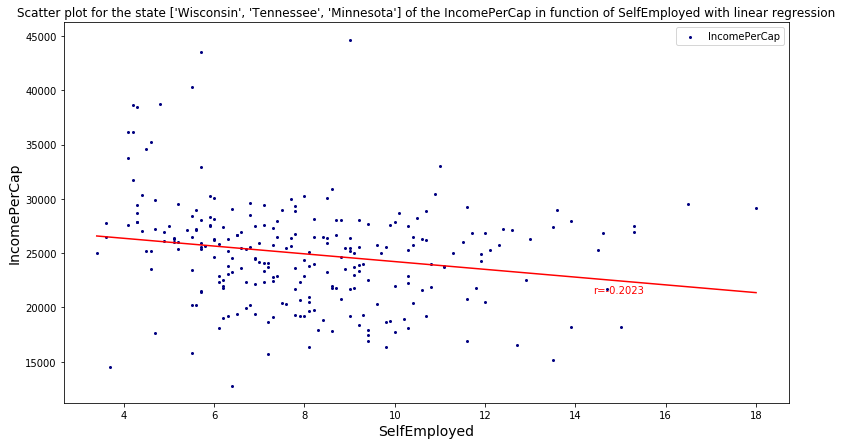

In [18]:
list_set_A = [['Wisconsin', 'Tennessee', 'Minnesota']]
df_county_selected_set_A = analysis_per_state(list_set_A, df_county)

In [19]:
print('Pearson correlation coefficient :', df_county_selected_set_A.corr(method='pearson'))
print('Spearman correlation coefficient :', df_county_selected_set_A.corr(method='spearman'))

Pearson correlation coefficient :               SelfEmployed  IncomePerCap
SelfEmployed      1.000000     -0.202294
IncomePerCap     -0.202294      1.000000
Spearman correlation coefficient :               SelfEmployed  IncomePerCap
SelfEmployed      1.000000     -0.236698
IncomePerCap     -0.236698      1.000000


In [20]:
# Create a dataframe to save the output of the bootstrap process :
correlation_list = pd.DataFrame(columns = ['Pearson','Spearman'])

# Use our Bootstrap function
correlation_list['Pearson'], correlation_list['Spearman'] = bootstrapping(df_county_selected_set_A, 0.8, 500)

# Display the caracteristic of the two Bootstrap distribution :
correlation_list.describe()

,Pearson,Spearman
count,500.000000,500.000000
mean,-0.191290,-0.211146
std,0.191960,0.185829
min,-0.703026,-0.714068
25%,-0.328079,-0.331870
50%,-0.209123,-0.240108
75%,-0.083767,-0.107852
max,0.469533,0.429448


**CONCLUSION**:
We observed a Pearson correlation of -0.2023 and a Spearman correlation of -0.23.  
Here we can say that there is a small correlation (linear and / or non-linear) describing the following effect : the higher SelfEmployed rate is, the lower is the IncomePerCap. However, we need to **be very careful** : the condifence level of theses results is low. In fact using a 500 repetition bootstrapping with 80 percent of the distribution, we found that the std. dev. is around 0.18 which is huge.

### 1.C : In which state within set A is the observed effect of self-employment on per-capita income the strongest?

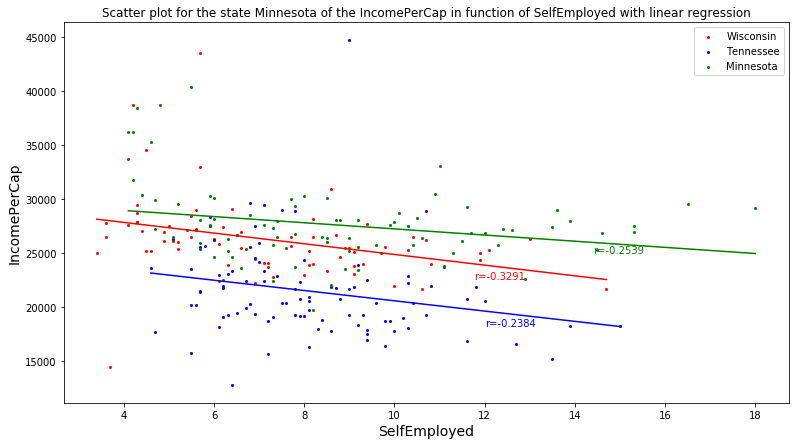

In [21]:
list_set_A = ['Wisconsin', 'Tennessee', 'Minnesota']
selected_df = analysis_per_state(list_set_A, df_county)

In [22]:
# Create a dataframe to save the output of the bootstrap process :
correlation_list = pd.DataFrame(columns = ['Pearson_Wisconsin',
                                           'Spearman_Wisconsin',
                                           'Pearson_Tennessee',
                                           'Spearman_Tennessee',
                                           'Pearson_Minesota',
                                           'Spearman_Minesota'])

# Use our Bootstrap function
correlation_list['Pearson_Wisconsin'], correlation_list['Spearman_Wisconsin'] = bootstrapping(df_county.loc[(df_county.State == 'Wisconsin'), ['SelfEmployed', 'IncomePerCap']], 0.8, 100)
correlation_list['Pearson_Tennessee'], correlation_list['Spearman_Tennessee'] = bootstrapping(df_county.loc[(df_county.State == 'Tennessee'), ['SelfEmployed', 'IncomePerCap']], 0.8, 100)
correlation_list['Pearson_Minnesota'], correlation_list['Spearman_Minnesota'] = bootstrapping(df_county.loc[(df_county.State == 'Minnesota'), ['SelfEmployed', 'IncomePerCap']], 0.8, 100)

# Display the caracteristic of the two Bootstrap distribution :
correlation_list.describe()

,Pearson_Wisconsin,Spearman_Wisconsin,Pearson_Tennessee,Spearman_Tennessee,Pearson_Minnesota,Spearman_Minnesota
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.328674,-0.454682,-0.242541,-0.319355,-0.256139,-0.211866
std,0.058242,0.050083,0.057578,0.053807,0.048536,0.055936
min,-0.482763,-0.578466,-0.423801,-0.461915,-0.345816,-0.311969
25%,-0.348097,-0.480892,-0.273686,-0.359063,-0.287799,-0.249891
50%,-0.315205,-0.449041,-0.236698,-0.321148,-0.260378,-0.213619
75%,-0.287310,-0.419386,-0.200387,-0.274446,-0.230071,-0.177484
max,-0.236047,-0.357586,-0.121362,-0.197457,-0.070616,-0.007245


**COMMENT**:
The correlation is negative and it's in the Wisconsin that the observed effect of self-employment on per-capita income is the strongest. These results are in adequation with the results obtained from part B where the correlations of each group was around 0.25. On the contrary, it is different compared to the overall correlation found in part A, which means that we need to beware of aggregates.
Moreover, we need to have a deeper look at the notion of confidence. In fact, by using the bootstrapping method for 500 repetitions and selecting randomly 80 percent of the dataset, we see that for the 3 groups, the standard deviation of the correlation coeficient is really low (between 0.06 and 0.04). It means that our results is stable and reproducible and thus we can generalized the results we found.

### 1.D : Analysis for set B

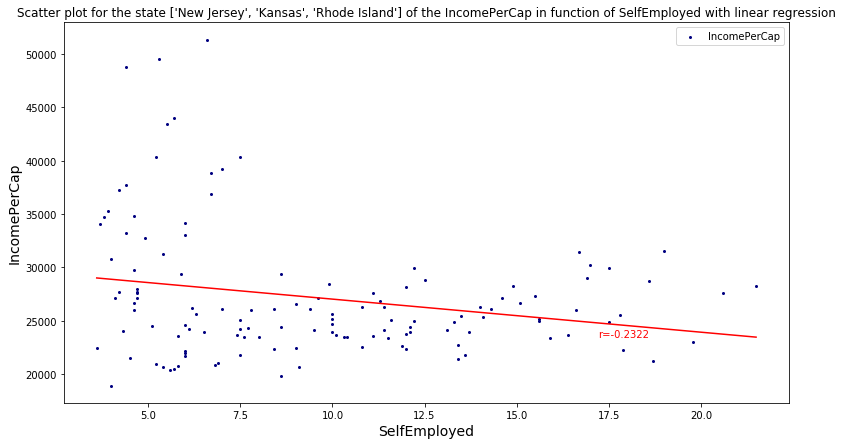

In [23]:
# Set B includes New Jersey, Kansas, and Rhode Island
list_set_B = [['New Jersey', 'Kansas', 'Rhode Island']]
df_county_selected_set_B = analysis_per_state(list_set_B, df_county)

In [24]:
print('Pearson correlation coefficient :', df_county_selected_set_B.corr(method='pearson'))
print('Spearman correlation coefficient :', df_county_selected_set_B.corr(method='spearman'))

# Create a dataframe to save the output of the bootstrap process :
correlation_list = pd.DataFrame(columns = ['Pearson','Spearman'])

# Use our Bootstrap function
correlation_list['Pearson'], correlation_list['Spearman'] = bootstrapping(df_county_selected_set_B, 0.8, 100)

# Display the caracteristic of the two Bootstrap distribution :
correlation_list.describe()

Pearson correlation coefficient :               SelfEmployed  IncomePerCap
SelfEmployed      1.000000     -0.232221
IncomePerCap     -0.232221      1.000000
Spearman correlation coefficient :               SelfEmployed  IncomePerCap
SelfEmployed      1.000000     -0.160106
IncomePerCap     -0.160106      1.000000


,Pearson,Spearman
count,100.000000,100.000000
mean,-0.196378,-0.145072
std,0.352285,0.379942
min,-0.884730,-0.942857
25%,-0.447458,-0.396853
50%,-0.250572,-0.180195
75%,-0.001303,0.100758
max,0.848750,0.951515


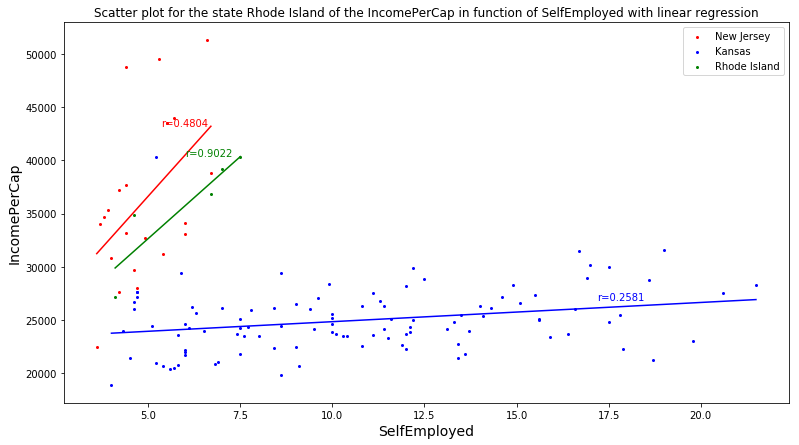

In [25]:
list_set_B = ['New Jersey', 'Kansas', 'Rhode Island']
df_per_state = analysis_per_state(list_set_B, df_county)

In [26]:
# Create a dataframe to save the output of the bootstrap process :
correlation_list = pd.DataFrame(columns = ['Pearson_NewJersey',
                                           'Spearman_NewJersey',
                                           'Pearson_Kansas',
                                           'Spearman_Kansas',
                                           'Pearson_RhodeIsland',
                                           'Spearman_RhodeIsland'])

# Use our Bootstrap function
correlation_list['Pearson_NewJersey'], correlation_list['Spearman_NewJersey'] = bootstrapping(df_county.loc[(df_county.State == 'New Jersey'), ['SelfEmployed', 'IncomePerCap']], 0.8, 500)
correlation_list['Pearson_Kansas'], correlation_list['Spearman_Kansas'] = bootstrapping(df_county.loc[(df_county.State == 'Kansas'), ['SelfEmployed', 'IncomePerCap']], 0.8, 500)
correlation_list['Pearson_RhodeIsland'], correlation_list['Spearman_RhodeIsland'] = bootstrapping(df_county.loc[(df_county.State == 'Rhode Island'), ['SelfEmployed', 'IncomePerCap']], 0.8, 500)

# Display the caracteristic of the two Bootstrap distribution :
correlation_list.describe()

,Pearson_NewJersey,Spearman_NewJersey,Pearson_Kansas,Spearman_Kansas,Pearson_RhodeIsland,Spearman_RhodeIsland
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.0
mean,0.522086,0.427880,0.237934,0.264249,9.079879e-01,1.0
std,0.073837,0.085240,0.064947,0.050065,8.112745e-15,0.0
min,0.281846,0.180702,0.077725,0.115300,9.079879e-01,1.0
25%,0.484562,0.371237,0.194843,0.231466,9.079879e-01,1.0
50%,0.529356,0.441305,0.229306,0.264170,9.079879e-01,1.0
75%,0.567430,0.485890,0.265856,0.296672,9.079879e-01,1.0
max,0.677266,0.622007,0.442675,0.403655,9.079879e-01,1.0


#### In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Regarding set B, we observe a positive correlation between Self Employement and Income per Cap and in Rhode Island this realtion is strong. It is the opposite of the set A in term of correlation. In addition, we see that we can be confident about the results for each county as the standard deviation is always lower than 0.01. In term of the overall set B, we obtained a high standard deviation around 0.35. This means that the distribution between the counties is can be significantly different and thus the value of the correlation for the set B is approximative due to the randomness in the choice of the sample (which county basically).

This difference between set A and B is a  good illustration of the Simpson's paradox. In fact, the paradox is osbserved when a trend appears in different groups of data but disappears or reverses when these groups are combined.

These results are often encountered in social-sciences and medical-sciences statistics and are particularly problematic when frequency data is unduly given causal interpretations. The paradoxical elements disappear when causal relations are brought into consideration. It has been used to try to inform the non-specialist or public audience about the kind of misleading results mis-applied statistics can generate.

So at the end, we can conclude that we would recommend incentivizing self-employment in set B as the correlation is positive, which means that counties that have a higher percentage of self-employed people earn more per capita. Moreover, in the group B, it would be better to incentivizing self-employment for specific counties such as Rhode Island. In fact, in set B, the distribution of the counties varies much more than for counties of set A.

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

# Prelude - the Animal Shelter 
Welcome to the animal shelter task. During this task, our group investigated the requierements a pet needs to fullfil in order to maximize its chances to be adopted. We will analyse which are the paramters that are the most important for an adoption. Will it be the age? Will it be the sex of the animal? Will it be the kind of animal? Let's try to find an answer! 
The Austin Animal Center is the largest no-kill animal shelter in the United States that provides care and shelter to over 18,000 animals each year. As part of the AAC's efforts to help and care for animals in need, the organization makes available its accumulated data and statistics as part of the city of Austin's Open Data Initiative.
During this Task, we will use two different classifiers and assess their accuracy, precision, f1-score and recall in order to save the maximum amount of animals possible. In the first step we will select a certain amount of features and select them using backward selection. 

### TASK A

#### 2.A.1 - Load the dataset and convert categorical features to a suitable numerical representation (use **dummy-variable encoding**). 

In [13]:
aac_intakes_outcomes_raw_df = pd.read_csv(data_folder + 'aac_intakes_outcomes.csv')

Visualize the data content of the dataframes

In [14]:
print('There are', len(aac_intakes_outcomes_raw_df.columns), 'features in the raw dataframe.')

There are 41 features in the raw dataframe.


**COMMENT** : Only 11 of the initial 41 features will be kept as mentionned in the task B description above. The kept features are the following 11 ones: 
    - animal_type
    - intake_year
    - intake_condition
    - intake_number
    - intake_type
    - sex_upon_intake
    - age_upon_intake_(years)
    - time_in_shelter_days
    - sex_upon_outcome
    - age_upon_outcome_(years)
    - outcome_type

In [15]:
 aac_intakes_outcomes_df = aac_intakes_outcomes_raw_df[['animal_type', 'intake_year', 'intake_condition', 
                                                        'intake_number', 'intake_type', 'sex_upon_intake','age_upon_intake_(years)', 
                                                        'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', 
                                                        'outcome_type']]

In [16]:
aac_intakes_outcomes_df.dtypes

animal_type                  object
intake_year                   int64
intake_condition             object
intake_number               float64
intake_type                  object
sex_upon_intake              object
age_upon_intake_(years)     float64
time_in_shelter_days        float64
sex_upon_outcome             object
age_upon_outcome_(years)    float64
outcome_type                 object
dtype: object

**COMMENT** : In this df the categorical data is: 
    - animal type (Cat, Dog, bird, ...)
    - sex_upon_outcome
    - sex_upon_intake
    - intake_type
    - outcome_type
    - intake_condition
By having a closer look to the datatype of these variables we can see that all these variables are of type "object", which makes it easier to select the columns to convert into categorical data:  

In [73]:
def compute_dummies(df):
    '''
    This function cleans up the dataframe provided and also converts its categorial data to dummy varaibles. 
    INPUT : 
    df : Pandas dataframe containing the raw information 
    OUTPUT: 
    df : Pandas dataframe with the features as dummy variables 
    '''
    dummy_series = df.select_dtypes(include='object')
    shape_before = dummy_series.shape

    ## Clean the data from null and NaN
    dummy_series[dummy_series.isnull().any(axis=1)]
    shape_after = dummy_series.shape

    if (shape_before == shape_after): 
        print('There were no null and NaN values in the Dataframe')

    dummy_series = pd.get_dummies(dummy_series)

    ##Replace the object typed columns by their dummy types equivalents:
    df = df.drop(columns = df.select_dtypes(include='object'))
    df = pd.concat([df, dummy_series], axis=1, sort=False)

    df.to_csv(data_folder + 'aac_intakes_outcomes_df.csv')
    
    return df

**COMMENT** : 
    The function was implemented here but we used it only once the dataframes were slipt in one datafame of 20% and 805 of the data. This was mentionned as being a good practise by the TAs during the Q&A session. 
    OFFICIAL TEXT: *The best practice would be to dummy encode after the split of the train/test sets "(e.g. some animals may appear only in the test set, in such case we could set all the dummy version of that variable to 0 or add another feature animal_other and set it to one for new animals found only in the test set)"*

#### 2.A.2 - Split the data into a training set (80%) and a test set (20%). 

In [74]:
def split_df(df, p=[0.8, 0.2]):
    '''
     create a random column and then split by it, this way we can get a split that will suit our needs and will be random. 
    INPUT : 
    df : Pandas dataframe containing the raw information 
    p  : Proportion of the data in the first DataFrame and in the Second DataFrame. 
    OUTPUT: 
    2 dataframes with 20% and 80% of the data.  
    '''
    df["rand"] = np.random.choice(len(p), len(df), p=p)
    r = [df[df["rand"]==val] for val in df["rand"].unique()]
    return r

In [75]:
aac_intakes_outcomes_df_80, aac_intakes_outcomes_df_20 = split_df(aac_intakes_outcomes_df) 

aac_intakes_outcomes_df_80.reset_index(drop=True, inplace=True)
aac_intakes_outcomes_df_20.reset_index(drop=True, inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [76]:
#remove the features that enabled us to split the dataset 
aac_intakes_outcomes_df_20 = aac_intakes_outcomes_df_20.drop(columns = ['rand'])
aac_intakes_outcomes_df_80 = aac_intakes_outcomes_df_80.drop(columns = ['rand'])
    
print('The DataFrame that contains all the data is of shape', aac_intakes_outcomes_df.shape)
print('The DataFrame that contains 80% of the data is of shape : ', aac_intakes_outcomes_df_80.shape)
print('The DataFrame that contains 20% of the data is of shape : ', aac_intakes_outcomes_df_20.shape)

The DataFrame that contains all the data is of shape (79672, 12)
The DataFrame that contains 80% of the data is of shape :  (63783, 11)
The DataFrame that contains 20% of the data is of shape :  (15889, 11)


#### Add the dummy features 

In [77]:
aac_intakes_outcomes_df_20 = compute_dummies(aac_intakes_outcomes_df_20)
aac_intakes_outcomes_df_80 = compute_dummies(aac_intakes_outcomes_df_80)

y_20 = aac_intakes_outcomes_df_20.outcome_type_Adoption
y_80 = aac_intakes_outcomes_df_80.outcome_type_Adoption

There were no null and NaN values in the Dataframe
There were no null and NaN values in the Dataframe


In [78]:
aac_intakes_outcomes_df_20.head()

,intake_year,intake_number,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years),animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,sex_upon_outcome_Unknown,outcome_type_Adoption,outcome_type_Died,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,outcome_type_Relocate,outcome_type_Return to Owner,outcome_type_Rto-Adopt,outcome_type_Transfer
0,2015,1.0,18.0,0.054167,18.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2015,1.0,15.0,23.104861,15.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2016,1.0,15.0,89.855556,15.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2015,1.0,13.0,0.045139,13.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2015,1.0,13.0,5.071528,13.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### 2.A.3: Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 

In [79]:
def compute_corr_matrix(df): 
    '''Before normalizing all the data we need to extract the training labels which is whether there is adoption for not. 
    Furthermore, we compute the correlation matrix in order to get an impression of which parameters are important for the model'''
    corr_matrix = df.corr().abs().outcome_type_Adoption
    corr_matrix_sorted = corr_matrix.sort_values(kind="quicksort", ascending = False)
    
    return corr_matrix_sorted

In [80]:
corr_matrix_sorted_80 = compute_corr_matrix(aac_intakes_outcomes_df_80)
corr_matrix_sorted_80[0:20]

outcome_type_Adoption             1.000000
outcome_type_Transfer             0.557248
outcome_type_Return to Owner      0.408460
sex_upon_outcome_Spayed Female    0.279531
sex_upon_outcome_Intact Male      0.267541
time_in_shelter_days              0.261931
sex_upon_outcome_Unknown          0.254464
sex_upon_intake_Unknown           0.254464
sex_upon_outcome_Intact Female    0.252248
outcome_type_Euthanasia           0.249550
sex_upon_outcome_Neutered Male    0.228264
animal_type_Other                 0.183091
intake_type_Wildlife              0.181824
intake_type_Owner Surrender       0.169969
intake_type_Public Assist         0.157670
intake_condition_Normal           0.153019
age_upon_intake_(years)           0.146348
age_upon_outcome_(years)          0.139839
sex_upon_intake_Intact Female     0.118216
intake_condition_Sick             0.105566
Name: outcome_type_Adoption, dtype: float64

In [81]:
corr_matrix_sorted_20 = compute_corr_matrix(aac_intakes_outcomes_df_20)
corr_matrix_sorted_20[0:20]

outcome_type_Adoption             1.000000
outcome_type_Transfer             0.557300
outcome_type_Return to Owner      0.404577
sex_upon_outcome_Spayed Female    0.284702
sex_upon_outcome_Intact Male      0.270211
time_in_shelter_days              0.253838
sex_upon_outcome_Unknown          0.253700
sex_upon_intake_Unknown           0.253700
outcome_type_Euthanasia           0.246758
sex_upon_outcome_Intact Female    0.242282
sex_upon_outcome_Neutered Male    0.217856
intake_type_Wildlife              0.181033
animal_type_Other                 0.179596
intake_type_Owner Surrender       0.171723
intake_condition_Normal           0.154762
intake_type_Public Assist         0.145610
age_upon_intake_(years)           0.129398
age_upon_outcome_(years)          0.123179
sex_upon_intake_Intact Female     0.121422
intake_condition_Sick             0.112960
Name: outcome_type_Adoption, dtype: float64

In [82]:
aac_intakes_outcomes_df_20 = aac_intakes_outcomes_df_20.drop(columns = ['sex_upon_intake_Intact Male', 'sex_upon_outcome_Intact Male', 
                                                  'outcome_type_Died', 'outcome_type_Disposal', 'outcome_type_Euthanasia',  'outcome_type_Missing', 
                                                  'outcome_type_Relocate', 'outcome_type_Return to Owner',  'outcome_type_Rto-Adopt', 'outcome_type_Transfer', 'outcome_type_Adoption'])

aac_intakes_outcomes_df_80 = aac_intakes_outcomes_df_80.drop(columns = ['sex_upon_intake_Intact Male', 'sex_upon_outcome_Intact Male', 
                                                  'outcome_type_Died', 'outcome_type_Disposal', 'outcome_type_Euthanasia',  'outcome_type_Missing', 
                                                  'outcome_type_Relocate', 'outcome_type_Return to Owner',  'outcome_type_Rto-Adopt', 'outcome_type_Transfer', 'outcome_type_Adoption'])

**COMMENT** 
We decide to remove these features since they do not add any information to the data. All the binary labels like *sex_upon_intake_Intact Male* or *sex_upon_outcome_Intact Male* are redundant with *sex_upon_intake_Intact Female* and *sex_upon_outcome_Intact Female* since an animal could either be of male or female sex. Since the *outcome_type* is only interesting whether it is an adoption or not it makes no sense to keep track of the other dummy parameters. Furthermore there are introducing a bias in the data since we know that if any other *outcome_type* was labeled with "1" then there is not way that the animal was adopted. By removing these columns we are removing the 1.00 negatively coreelated data from the feature vector. Essentially, the columns dealing with male or female binary categoric data we removed. The same was true for the adoption type. We only care about the adoption and it is not possible to have multiple outcome types. 

Text(0,0.5,' Pearson Correlation Score')

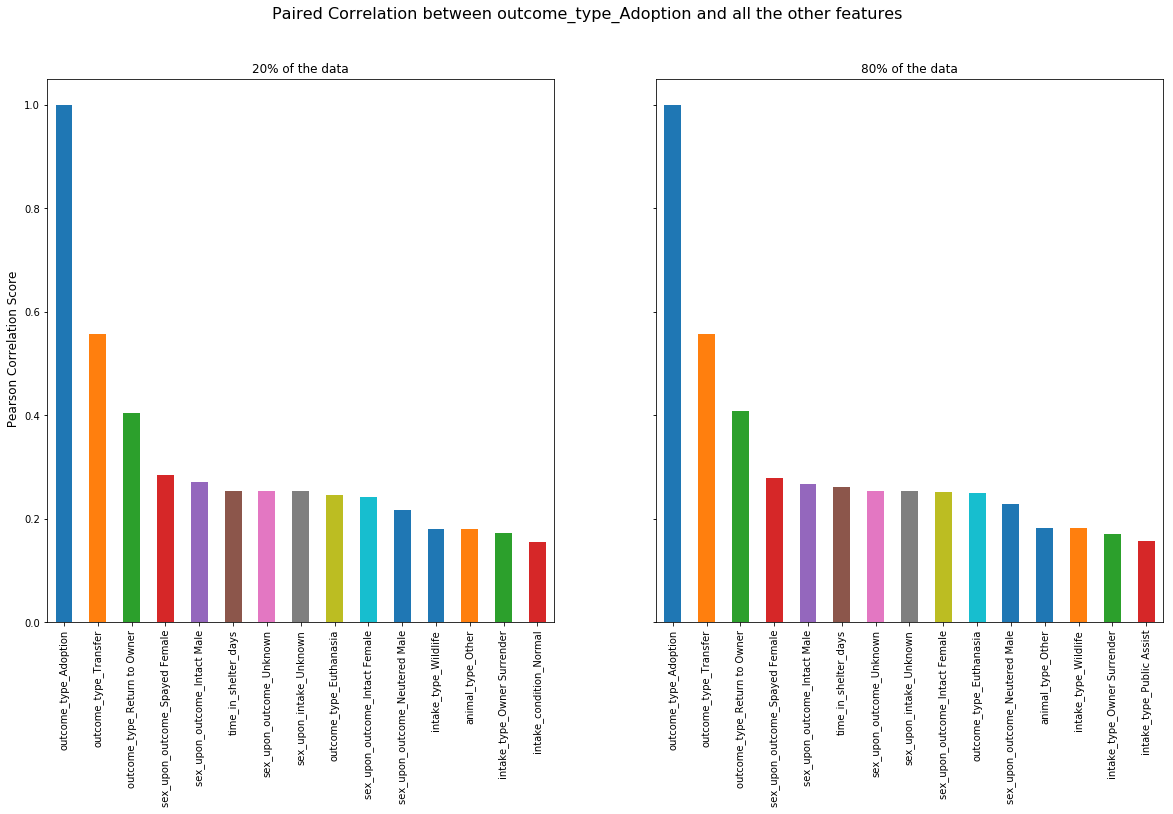

In [83]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,  figsize=(20,10))
corr_matrix_sorted_20[0:15].plot(kind = 'bar', ax = ax1, title = '20% of the data')
corr_matrix_sorted_80[0:15].plot(kind = 'bar', ax = ax2, title = '80% of the data')
f.suptitle("Paired Correlation between outcome_type_Adoption and all the other features", fontsize=16)
ax1.set_ylabel(' Pearson Correlation Score', fontsize='large')

**COMMENT** : 
We can see that if we consider the 15 highest correlations between outcome_type_Adoption and all the other features is the same between the both features vectors. This means that the 80-20 split has introduced no bias in the data by producing a bottleneck on the main feature. However, by visualizing the 18th and lower correalted feature we started to see some minor differences bwtween the vectors. 

#### 2.A.4 : Standardize the values of each feature in the data to have mean 0 and variance 1. **The use of external libraries is not permitted in part A, except for numpy and pandas.**

The standartization progress makes it possible to transform the data distribution in a way such that the distribution of the standartized sample is of mean = 0 and std. dev. = 1. In the following tables, we can see how the distribution of the data is affected by standization.   
The standartization of the data is given by:     $y = (x - mean) / standard deviation$

In [84]:
aac_intakes_outcomes_df_80.describe()

,intake_year,intake_number,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years),animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
count,63783.000000,63783.000000,63783.000000,63783.000000,63783.000000,63783.000000,63783.000000,63783.000000,63783.000000,63783.000000,...,63783.000000,63783.000000,63783.000000,63783.000000,63783.000000,63783.000000,63783.000000,63783.000000,63783.000000,63783.000000
mean,2015.436935,1.127354,2.106341,16.782796,2.141099,0.004155,0.371102,0.569305,0.055438,0.004108,...,0.702272,0.043319,0.298638,0.159807,0.140084,0.084709,0.117241,0.354107,0.321481,0.084709
std,1.302136,0.455861,2.890726,41.369418,2.897629,0.064324,0.483103,0.495177,0.228835,0.063960,...,0.457263,0.203575,0.457664,0.366430,0.347077,0.278450,0.321710,0.478246,0.467048,0.278450
min,2013.000000,1.000000,0.000000,0.000694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,1.000000,0.164384,1.107639,0.246575,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,1.000000,1.000000,4.992361,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,1.000000,3.000000,13.802431,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2018.000000,13.000000,25.000000,1606.194444,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
def standardize(df): 
    mean = np.mean(df)
    std = np.std(df)
    
    return (df - mean) / std

standart_80 = standardize(aac_intakes_outcomes_df_80)
standart_20 = standardize(aac_intakes_outcomes_df_20)

In [86]:
standart_80.describe()

,intake_year,intake_number,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years),animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
count,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04,...,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04,6.378300e+04
mean,-2.590513e-13,-3.055566e-14,1.608070e-13,3.907072e-15,2.467238e-13,1.524683e-14,1.659436e-14,1.167288e-15,-1.601923e-14,2.505022e-14,...,-1.064638e-14,-1.415346e-15,-3.304299e-14,-7.134023e-14,4.364943e-15,-2.297161e-14,1.859792e-14,-1.534460e-14,-3.047602e-15,-2.297161e-14
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.871505e+00,-2.793716e-01,-7.286603e-01,-4.056676e-01,-7.389199e-01,-6.459137e-02,-7.681686e-01,-1.149709e+00,-2.422637e-01,-6.422321e-02,...,-1.535828e+00,-2.127915e-01,-6.525307e-01,-4.361231e-01,-4.036146e-01,-3.042184e-01,-3.644343e-01,-7.404349e-01,-6.883294e-01,-3.042184e-01
25%,-1.103530e+00,-2.793716e-01,-6.717941e-01,-3.789099e-01,-6.538237e-01,-6.459137e-02,-7.681686e-01,-1.149709e+00,-2.422637e-01,-6.422321e-02,...,-1.535828e+00,-2.127915e-01,-6.525307e-01,-4.361231e-01,-4.036146e-01,-3.042184e-01,-3.644343e-01,-7.404349e-01,-6.883294e-01,-3.042184e-01
50%,-3.355549e-01,-2.793716e-01,-3.827238e-01,-2.850059e-01,-3.938075e-01,-6.459137e-02,-7.681686e-01,8.697855e-01,-2.422637e-01,-6.422321e-02,...,6.511146e-01,-2.127915e-01,-6.525307e-01,-4.361231e-01,-4.036146e-01,-3.042184e-01,-3.644343e-01,-7.404349e-01,-6.883294e-01,-3.042184e-01
75%,1.200395e+00,-2.793716e-01,3.091493e-01,-7.204329e-02,2.964174e-01,-6.459137e-02,1.301798e+00,8.697855e-01,-2.422637e-01,-6.422321e-02,...,6.511146e-01,-2.127915e-01,1.532495e+00,-4.361231e-01,-4.036146e-01,-3.042184e-01,-3.644343e-01,1.350558e+00,1.452793e+00,-3.042184e-01
max,1.968370e+00,2.604463e+01,7.919754e+00,3.842027e+01,7.888891e+00,1.548194e+01,1.301798e+00,8.697855e-01,4.127733e+00,1.557070e+01,...,6.511146e-01,4.699435e+00,1.532495e+00,2.292930e+00,2.477611e+00,3.287112e+00,2.743979e+00,1.350558e+00,1.452793e+00,3.287112e+00


**COMMENT** : 
As we can see from the plots above, the standartization was not able (for most of the features) to change the distributions for each specific parameter into a normal distributed parameters. The histograms for many features is still skewed. This should make the predictions for the classifiers quite accurate.  

### TASK B

#### 2.B.1 : Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 

In [87]:
import sklearn
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(standart_80, y_80)

In [88]:
clf.score(standart_20, y_20)

0.8200641953552772

**COMMENT** : 
- We used the "multinomial" multi_class paramters in order to use the cross-entropy loss as a loss function
- We can see that y using the default threshold of sklearn we are able to predict the data with 82% of accuracy. 
Logistic regression chooses the class that has the biggest probability. In case of 2 classes, the threshold is 0.5: if P(Y=0) > 0.5 then obviously P(Y=0) > P(Y=1). 

#### 2.B.2: For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. 

In [89]:
def compute_confusion_matrix(true, pred):
    '''
      Computes a confusion matrix using numpy for two np.arrays
      true and pred.
      INPUT: 
      true: Groundtruth
      pred: Predicted Classes by the classifier
      OUTPUT: 
      result: Confusion Matrix
  '''

    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

In [90]:
from sklearn.metrics import accuracy_score

pred_proba_df = pd.DataFrame(clf.predict_proba(standart_20))
threshold_list = [0.5]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_20.values.reshape(y_20.values.size,1),
                                           Y_test_pred.iloc[:,1].values.reshape(Y_test_pred.iloc[:,1].values.size,1))
    
    confusion_matrix = compute_confusion_matrix(y_20.values, Y_test_pred.iloc[:,1].values)
    print(confusion_matrix)
    print('Our testing accuracy is {}'.format(test_accuracy))


******** For i = 0.5 ******
[[7578. 1687.]
 [1172. 5452.]]
Our testing accuracy is 0.8200641953552772


#### 2.B.3: Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 
Accuracy is the proximity of measurement results to the true value; precision, the repeatability, or reproducibility of the measurement

- precision or positive predictive value (PPV) : The precision is given by : PPV = TP / (FP+TP)
- accuracy (ACC) = (TP+TN) / (TP+TN+FP+FN)
- F1 score is the harmonic mean of precision and sensitivity = (2TP) / (2TP+FP+FN) 
- sensitivity, recall, hit rate, or true positive rate (TPR) = TP / (TP + FN) 

In [91]:
def compute_accuracy(confusion_matrix):
    TP, FP, TN, FN = confusion_matrix_decomposition(confusion_matrix)
    return (TP+TN) / (TP+TN+FP+FN) 

def compute_precision(confusion_matrix):
    TP, FP, TN, FN = confusion_matrix_decomposition(confusion_matrix)
    return TP / (FP+TP)

def compute_f1(confusion_matrix):
    TP, FP, TN, FN = confusion_matrix_decomposition(confusion_matrix)
    return  (2*TP) / (2*TP+FP + FN) 

def compute_recall(confusion_matrix):
    TP, FP, TN, FN = confusion_matrix_decomposition(confusion_matrix)
    return TP / (TP + FN)

def confusion_matrix_decomposition(confusion_matrix): 
    TP = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    TN = confusion_matrix[1,1]
    FN = confusion_matrix[1,0]
    
    return TP, FP, TN, FN

In [92]:
accuracy = []
precision = []
f1_score = []
recall = []

print('accuracy', compute_accuracy(confusion_matrix))
print('precision', compute_precision(confusion_matrix))
print('F1', compute_f1(confusion_matrix))
print('recall', compute_recall(confusion_matrix))

accuracy 0.8200641953552772
precision 0.8179168915272531
F1 0.8412989175686928
recall 0.8660571428571429


#### 2.B.3: Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. 

In [93]:
pred_proba_df = pd.DataFrame(clf.predict_proba(standart_20)) #predict the labels

threshold_list = np.linspace(0.0001, 1, 1000)
accuracy = []
precision = []
f1_score = []
recall = []

for i in threshold_list:
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_20.values.reshape(y_20.values.size,1),
                                           Y_test_pred.iloc[:,1].values.reshape(Y_test_pred.iloc[:,1].values.size,1))
    confusion_matrix = compute_confusion_matrix(y_20.values, Y_test_pred.iloc[:,1].values)
    
    accuracy.append(compute_accuracy(confusion_matrix))
    precision.append(compute_precision(confusion_matrix))
    f1_score.append(compute_f1(confusion_matrix))
    recall.append(compute_recall(confusion_matrix))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


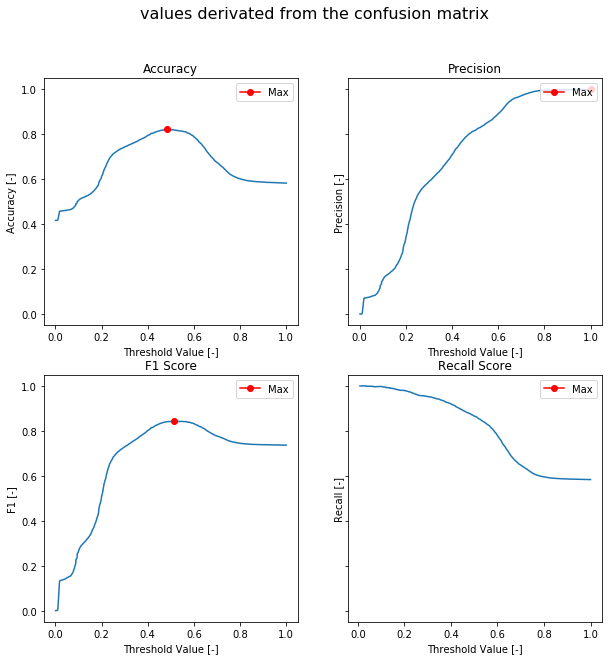

In [94]:
f, axes = plt.subplots(2, 2, sharey=True, figsize=(10,10))
    
axes[0,0].plot(threshold_list, accuracy)
axes[0,0].plot(threshold_list[np.argmax(accuracy)], np.max(accuracy), color = 'red', marker='o', label = 'Max')
axes[0,0].title.set_text('Accuracy')
axes[0,0].set_ylabel('Accuracy [-]')
axes[0,0].set_xlabel('Threshold Value [-]')
axes[0,0].legend(loc="upper right")

axes[0,1].plot(threshold_list, precision)
axes[0,1].plot(threshold_list[np.argmax(precision)], np.max(precision), color = 'red', marker='o', label = 'Max')
axes[0,1].title.set_text('Precision')
axes[0,1].set_ylabel('Precision [-]')
axes[0,1].set_xlabel('Threshold Value [-]')
axes[0,1].legend(loc="upper right")

axes[1,0].plot(threshold_list, f1_score)
axes[1,0].plot(threshold_list[np.argmax(f1_score)], np.max(f1_score), color = 'red', marker='o', label = 'Max')
axes[1,0].title.set_text('F1 Score')
axes[1,0].set_ylabel('F1 [-]')
axes[1,0].set_xlabel('Threshold Value [-]')
axes[1,0].legend(loc="upper right")

axes[1,1].plot(threshold_list, recall)
axes[1,1].plot(threshold_list[np.argmax(recall)], np.max(recall), color = 'red', marker='o', label = 'Max')
axes[1,1].title.set_text('Recall Score')
axes[1,1].set_ylabel('Recall [-]')
axes[1,1].set_xlabel('Threshold Value [-]')
axes[1,1].legend(loc="upper right")


f.suptitle("values derivated from the confusion matrix", fontsize=16)
plt.show()

**COMMENT** 
We can see that changing the threshold does not have a lot of impact in the training accuracy. The only value for which the prediction accuracy changes is when the threshold is set at 0.01. This means that the logistic regression here, splits the data quite clearly. 

In [95]:
print('The maximal Precison', np.max(precision), ' is reached for a threshold value of ', threshold_list[np.argmax(precision)])
print('The maximal Accuracy', np.max(accuracy), ' is reached for a threshold value of ', threshold_list[np.argmax(accuracy)])
print('The maximal Recall', np.max(recall), ' is reached for a threshold value of ', threshold_list[np.argmax(recall)])
print('The maximal F1', np.max(f1_score), ' is reached for a threshold value of ', threshold_list[np.argmax(f1_score)])

The maximal Precison 1.0  is reached for a threshold value of  1.0
The maximal Accuracy 0.821889357417081  is reached for a threshold value of  0.484
The maximal Recall nan  is reached for a threshold value of  0.001
The maximal F1 0.8430616740088106  is reached for a threshold value of  0.512


#### 2.B.4: The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

In this case, the False Negative (FN) values are the most important to focus on. A **False Negative (FN)** value means that the regression classified an animal as being not adopted even if the animal would have been adopted. This would have major consequences for the animal since it would be put to sleep or refused from the shelter even if it would have been adopted. The recall, accuracy and F1 score are depending on the FN values. The F1 score is the harmonic mean of the sensitivity and precision. This score penalizes a lot a model which is making mistakes on classification. However, the recall, also called, sensitivity measure seems to be the most critical regarding the False Negatives. Since we assess which measure of the error is the most critical to us, we decide to adapt the threshold for the next parts based on the threshold that gave the maximal recall value. However, considering the other score we can see that setting the threshold to the ideal one of the recall leads to very poor performance on the other scores. therefore we decide to set the threshold to 0.2 since all the scores are "good" and the recall very good for this value. By doing so we still gave more importance to the recall score but we still respected the information given by the three others.
#### SUMMARY 
- Ideal **Recall threshold = 0.001**
- **Chosen Threshold = 0.2**

#### Accuracy of the best Model

In [106]:
threshold = 0.2
Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>threshold else 0)
test_accuracy = accuracy_score(y_20.values.reshape(y_20.values.size,1),
                                           Y_test_pred.iloc[:,1].values.reshape(Y_test_pred.iloc[:,1].values.size,1))

print('The score for the best threshold, that maximizes the recall, is' , test_accuracy) 

The score for the best threshold, that maximizes the recall, is 0.612058656932469


### Task C 

Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. 

**ANSWER**: 
In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.
Backward elimination could be done in the following steps 
    - STEP 1 : Select a **significant level** (ie: 0.05 ; If the P value is greater than this significant level, then we will remove it) or chose the **number k of features** to keep
    - STEP 2: Fit ALL training variables to the model.
    - STEP 3: Find the P values for ALL variables.
    - STEP 4: Remove the variable with the largest P value.
    - STEP 5: Fit the model with a variable removed from Step 4.
    - STEP 6: Repeat Step 4 & 5 , until all P values are smaller than the significant level defined in Step 1.
    
Since we were not allowed to use the backward selection function that are already implemented we needed to implement our own script. The variance covariance matrix can be aproximated by the **inverse of the negative Hessian H** (matrix of second order partial derivatives). 

In [97]:
# compare with statsmodels
import statsmodels.api as sm

## TEST THE HANDMADE SOLUTION 
def compute_p_values(x, y): 
    '''
    Computes the p-values using the function already implemented in a library.
    The results from this function will be usefull to compare the results from our custom fucntion with.
    '''
    
    X = sm.add_constant(x + 0.001*np.random.rand(x.shape[0], x.shape[1])) #avoid singular matrix)
    fit = sm.Logit(y, X).fit(method="bfgs", maxiter=100000)
    print(fit.summary())
    
    return fit.pvalues, fit.params, fit

##HANDMADE 
def compute_p_value_lr(X, y): 
    '''
    Computes the p-values using the negative inverse of the Hessian Matrix.
    The results from this function will be usefull to compare the results from our custom fucntion with.
    '''
    model = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)    
    predictions = model.predict(X)
    params = model.coef_[0]

    ## add VERY small white noise in order to make sure that the hessian matrix is invertible for any data. 
    newX = X + 0.0001 * np.random.rand(X.shape[0], X.shape[1])
                
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

    var_b = MSE * (np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    
    ## 3 solutions np.abs(), max(0 et x) ou alors laisser comme c'est ! 
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b, 5)
    ts_b = np.round(ts_b, 5)
    p_values = np.round(p_values, 5)
    params = np.round(params, 5)
    name = X.columns
                     
    myDF3 = pd.DataFrame()
    myDF3["Name"],myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t_values"],myDF3["Probability"] = [name, params,sd_b,ts_b,p_values]    
    return myDF3, newX

In [98]:
## Select the k-best features 
from scipy import stats
myDF, X = compute_p_value_lr(standart_80, y_80)
myDF

,Name,Coefficients,Standard Errors,t_values,Probability
0,intake_year,0.10199,0.00167,60.90541,0.00000
1,intake_number,0.02883,0.00170,16.93071,0.00000
2,age_upon_intake_(years),-0.97213,0.03417,-28.44690,0.00000
3,time_in_shelter_days,0.38401,0.00177,217.24499,0.00000
4,age_upon_outcome_(years),0.77439,0.03414,22.68040,0.00000
5,animal_type_Bird,0.11182,4.41719,0.02531,0.97980
6,animal_type_Cat,-0.01354,33.17538,-0.00041,0.99967
7,animal_type_Dog,-0.02676,34.00449,-0.00079,0.99937
8,animal_type_Other,0.05505,15.71440,0.00350,0.99720
9,intake_condition_Aged,0.01840,6.01048,0.00306,0.99756


In [99]:
## Select the k-best features 
features = len(standart_80.columns)
x = standart_80

k = 5 

while len(x.columns) >= k: 
    
    tmp_df, x = compute_p_value_lr(x, y_80)
    tmp_df.t_values = tmp_df.t_values.abs()
    t_values_sorted = tmp_df[['t_values', 'Name', 'Probability']].sort_values('t_values', ascending = True)
    x = x.drop(columns = [t_values_sorted.Name.iloc[0]])
    
print('The features that have been kept are \n', t_values_sorted)

The features that have been kept are 
     t_values                            Name  Probability
0  191.46617         age_upon_intake_(years)          0.0
1  249.29863            time_in_shelter_days          0.0
2  267.45744            intake_type_Wildlife          0.0
3  321.26197  sex_upon_outcome_Neutered Male          0.0
4  332.29428  sex_upon_outcome_Spayed Female          0.0


**COMMENT**:  
The backward feature selection that we are using is computing the t-value (and also the p-value) at each iteration. The lowest t-value is removed at each step since high t-values tend to reject the null hypothesis which was here that all the parameters = 0 and that a simple model explains as well the problem as the complex model. We decide to deal with the t-values directly and not the p-values since we are comparing the feature between each other and not versus a 95% significance scale. Therefore, keeping the t-values gives us numbers which are further away from 0. So instead of having 10 features with a value of zero the have 10 features with high t-values. 

Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

In [100]:
## Now with cross validation
ks = [1, 5, 10, 15, 20, 25, 30]
p_values_k = []

for i in ks: 
    p_values_i_th_cross = []
    for j in range(5): 
        ## fit the model to ALL variables
        x = standart_80
        ## Select the k-best features 
        while len(x.columns) >= i: 
            tmp_df, x = compute_p_value_lr(x, y_80)
            tmp_df.t_values = tmp_df.t_values.abs()
            t_values_sorted = tmp_df[['t_values', 'Name', 'Probability']].sort_values('t_values', ascending = True)
            x = x.drop(columns = [t_values_sorted.Name.iloc[0]])
    
        print('The features that have been kept are \n', t_values_sorted) 
        p_values_i_th_cross.append(t_values_sorted)
            
    p_values_k.append(p_values_i_th_cross)

The features that have been kept are 
     t_values                            Name  Probability
0  123.01454  sex_upon_outcome_Spayed Female          0.0
The features that have been kept are 
     t_values                            Name  Probability
0  123.01508  sex_upon_outcome_Spayed Female          0.0
The features that have been kept are 
    t_values                            Name  Probability
0  123.0149  sex_upon_outcome_Spayed Female          0.0
The features that have been kept are 
     t_values                            Name  Probability
0  123.01489  sex_upon_outcome_Spayed Female          0.0
The features that have been kept are 
     t_values                            Name  Probability
0  123.01478  sex_upon_outcome_Spayed Female          0.0
The features that have been kept are 
     t_values                            Name  Probability
0  191.46655         age_upon_intake_(years)          0.0
1  249.29560            time_in_shelter_days          0.0
2  267.20580  

The features that have been kept are 
      t_values                            Name  Probability
3    22.60596        age_upon_outcome_(years)          0.0
1    28.36817         age_upon_intake_(years)          0.0
5    42.02108         intake_condition_Normal          0.0
0    60.79353                     intake_year          0.0
12   64.88282  sex_upon_outcome_Intact Female          0.0
4    65.85587                animal_type_Bird          0.0
6    94.42671     intake_type_Owner Surrender          0.0
11   98.98049         sex_upon_intake_Unknown          0.0
9   112.75608   sex_upon_intake_Intact Female          0.0
10  122.36503   sex_upon_intake_Neutered Male          0.0
7   123.89428       intake_type_Public Assist          0.0
14  167.52350  sex_upon_outcome_Spayed Female          0.0
8   168.56966            intake_type_Wildlife          0.0
2   220.47591            time_in_shelter_days          0.0
13  295.32720  sex_upon_outcome_Neutered Male          0.0
The features that

The features that have been kept are 
      t_values                            Name  Probability
13    3.83009       intake_condition_Pregnant      0.00013
12    6.45991          intake_condition_Other      0.00000
6     6.86731                 animal_type_Dog      0.00000
14    7.26692           intake_condition_Sick      0.00000
10    9.64750        intake_condition_Injured      0.00000
8    10.30871           intake_condition_Aged      0.00000
11   11.09200         intake_condition_Normal      0.00000
1    16.93146                   intake_number      0.00000
9    17.07975          intake_condition_Feral      0.00000
7    17.82580               animal_type_Other      0.00000
15   18.12361  intake_type_Euthanasia Request      0.00000
4    22.66129        age_upon_outcome_(years)      0.00000
2    28.42704         age_upon_intake_(years)      0.00000
0    60.90885                     intake_year      0.00000
21   64.82881  sex_upon_outcome_Intact Female      0.00000
5    66.49714    

The features that have been kept are 
      t_values                            Name  Probability
13    0.00015        intake_condition_Nursing      0.99988
6     0.00041                 animal_type_Cat      0.99967
7     0.00079                 animal_type_Dog      0.99937
24    0.00090   sex_upon_intake_Spayed Female      0.99928
12    0.00114         intake_condition_Normal      0.99909
16    0.00122           intake_condition_Sick      0.99903
11    0.00149        intake_condition_Injured      0.99881
20    0.00226               intake_type_Stray      0.99820
15    0.00261       intake_condition_Pregnant      0.99791
14    0.00287          intake_condition_Other      0.99771
9     0.00304           intake_condition_Aged      0.99758
25    0.00327         sex_upon_intake_Unknown      0.99739
29    0.00327        sex_upon_outcome_Unknown      0.99739
8     0.00351               animal_type_Other      0.99720
17    0.00556  intake_type_Euthanasia Request      0.99556
18    0.00833    

In [101]:
def countElement(a):
    g = {}
    for i in a:
        if i in g: 
            g[i] +=1
        else: 
            g[i] =1
    return g

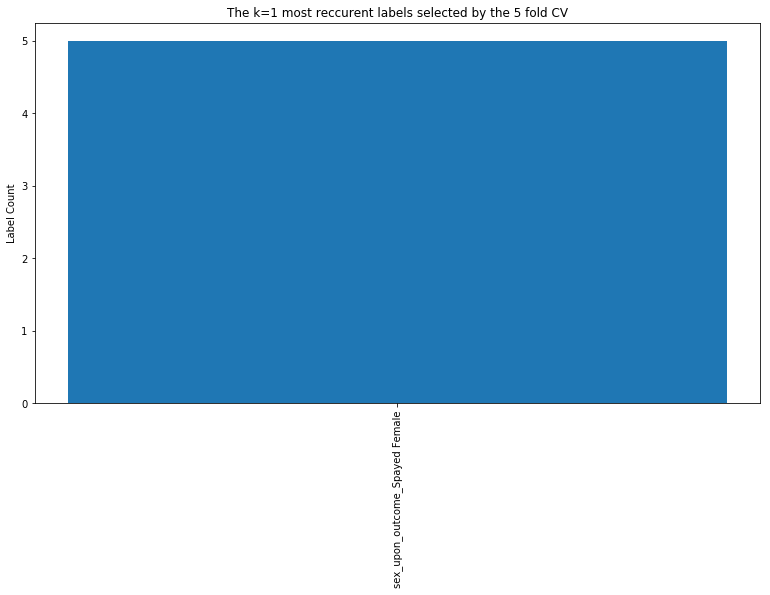

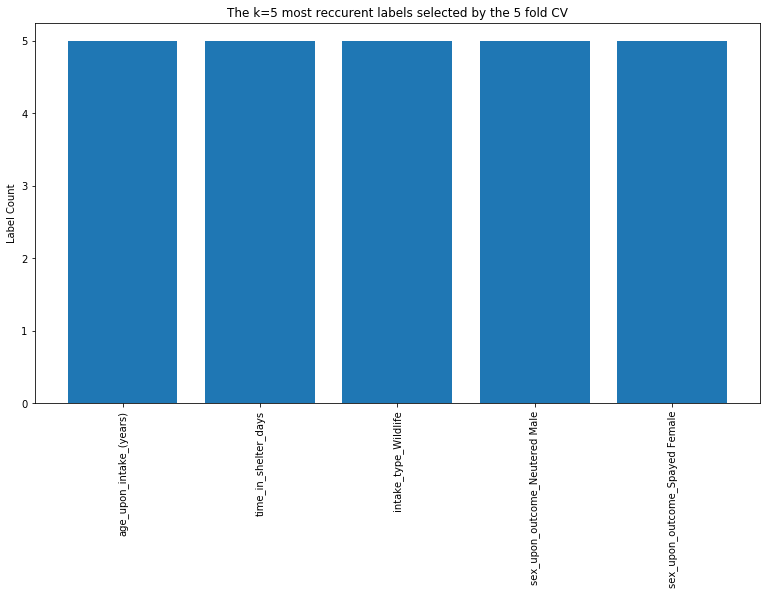

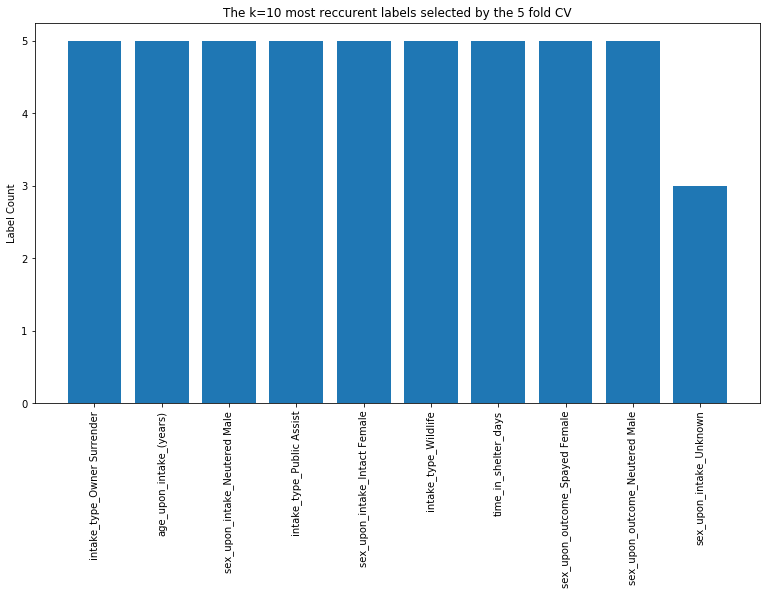

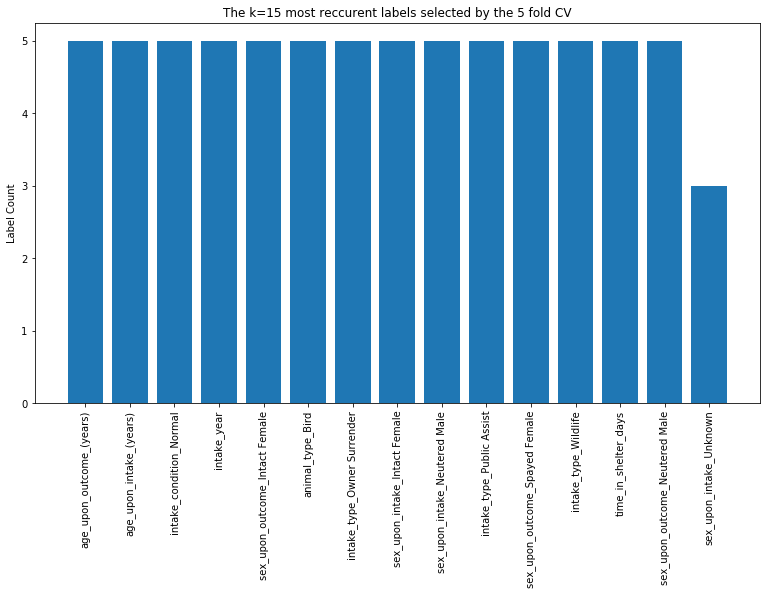

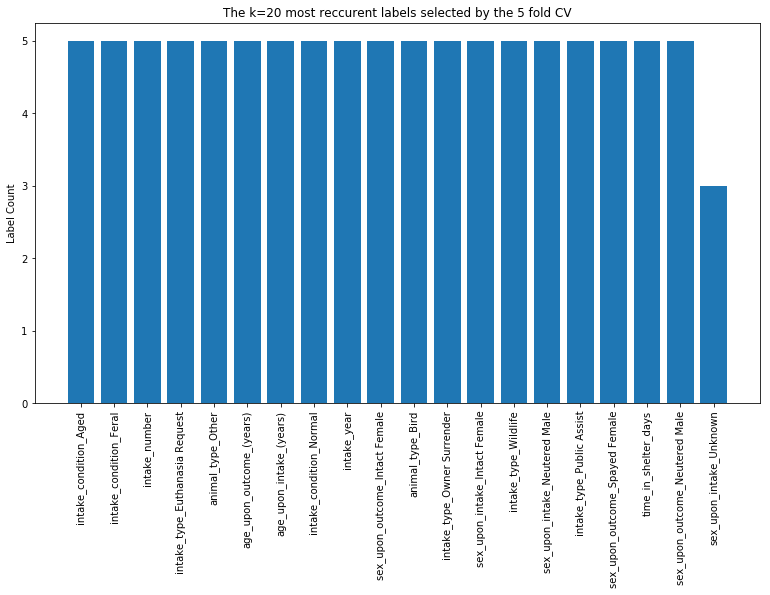

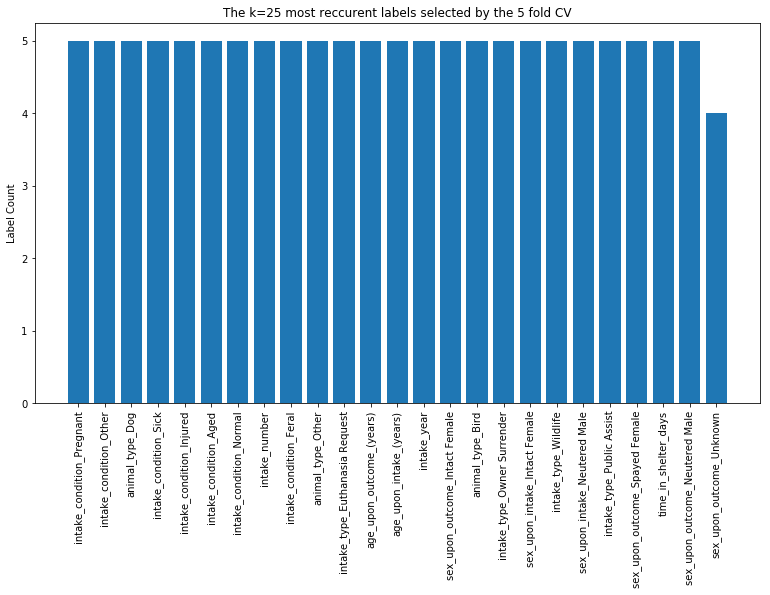

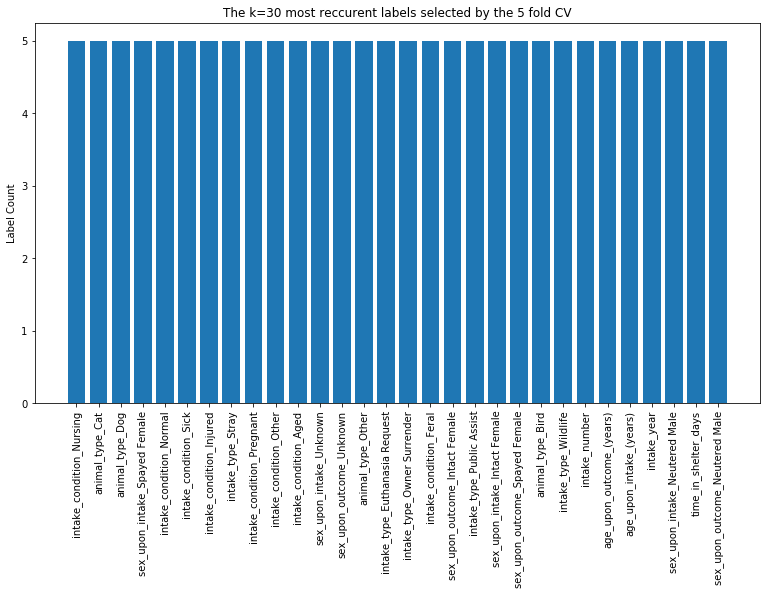

In [102]:
import operator 

for k in range(len(ks)): #accross all differents number of parameters
    
    top_features = []

    for i in p_values_k[k]: #accross all repetitons
        for j in i.values: #accross all the features in each repetition
            top_features.append(j[1])

    top_features_unique = np.unique(top_features)
    element_recurrence = countElement(top_features)
    sorted_element_recurrence = sorted(element_recurrence.items(), key=operator.itemgetter(1), reverse = True)

    x, y = zip(*sorted_element_recurrence[:ks[k]]) # unpack a list of pairs into two tuples

    plt.bar(x, y)
    plt.xticks(rotation=90)
    plt.title('The k=' + str(ks[k]) + ' most reccurent labels selected by the 5 fold CV')
    plt.ylabel('Label Count')
    plt.show()

**COMMENT**: From the above results, we can see that the 5 fold cross-validation that we implemented selects almost always the same parameters for different versions of the data. This is a good sign since it means that one can rely on the selected features. The only feature, on which it is possible to have a doubt is the sex_upon_outcome_unknow feature which is select 3 out 5 times for a reduced number of parameters. However, this is still in 60% of the case which seems to be acceptable. 

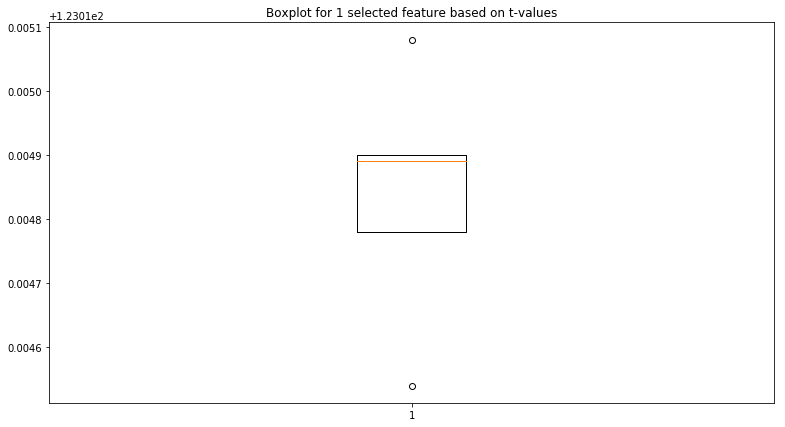

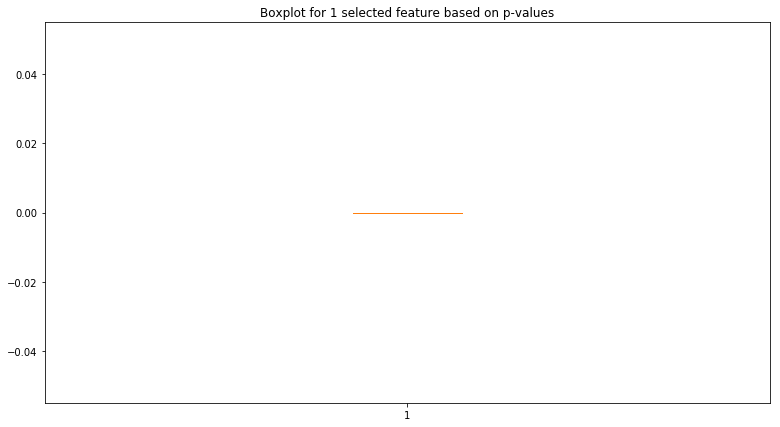

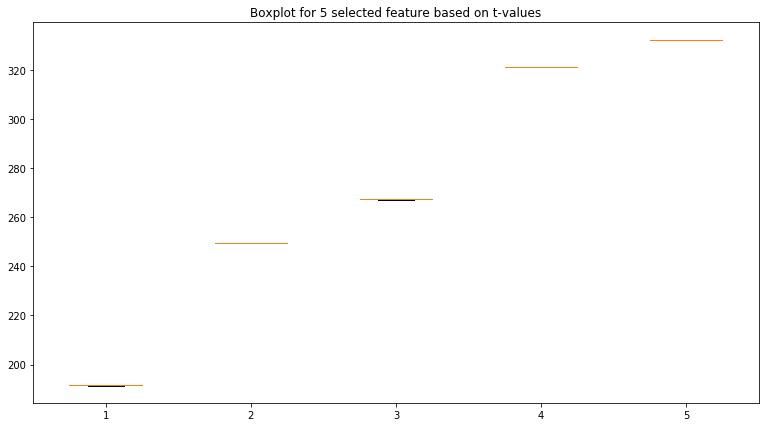

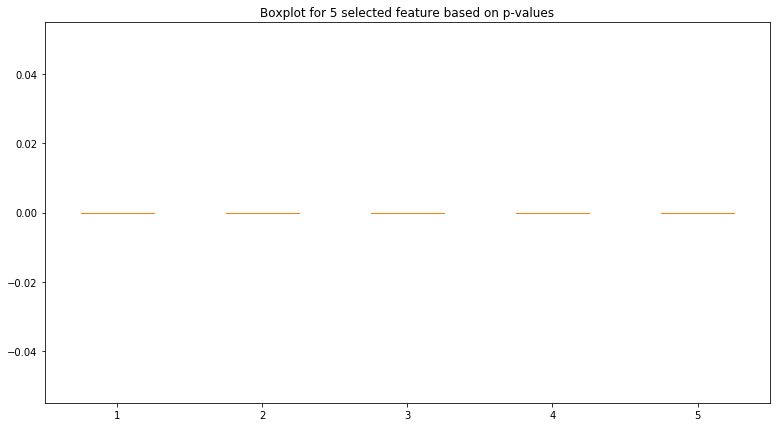

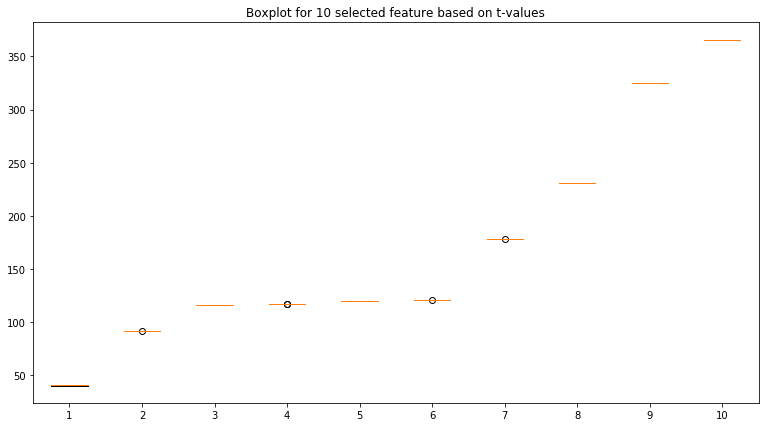

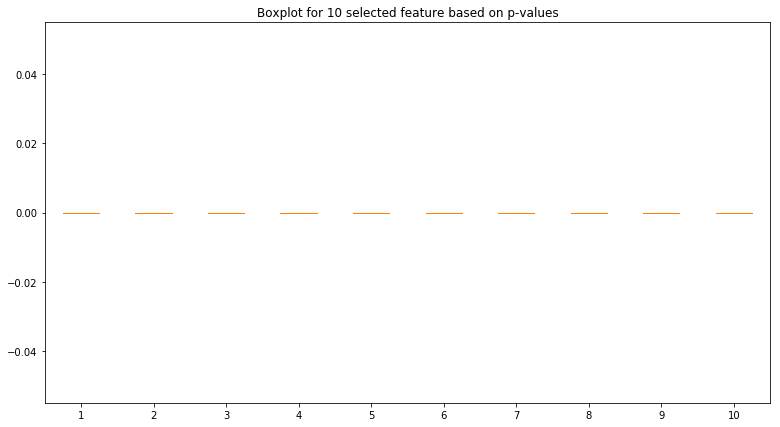

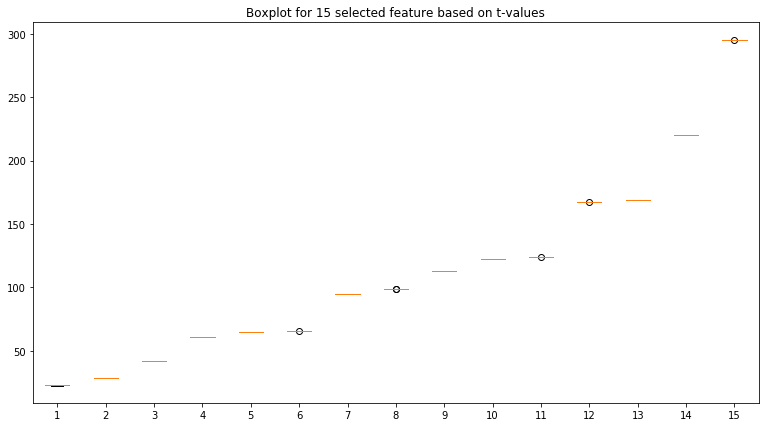

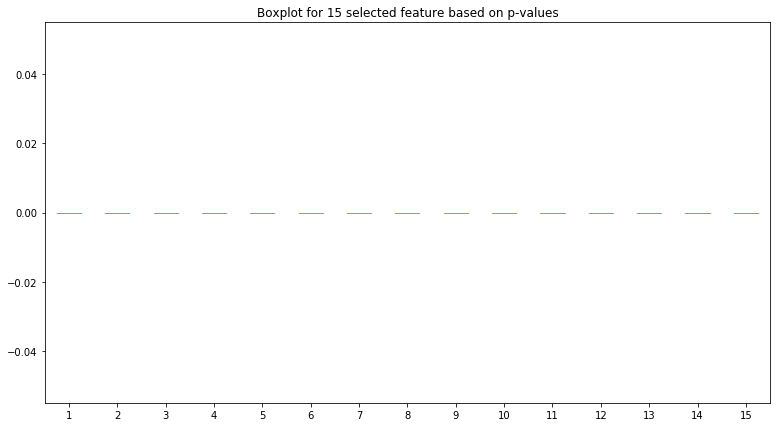

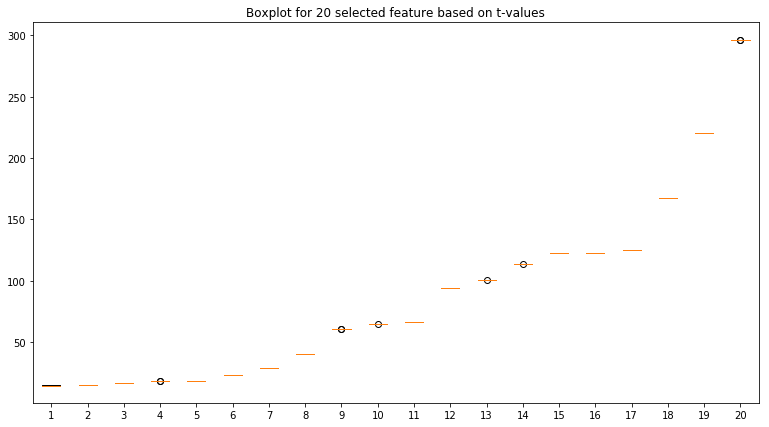

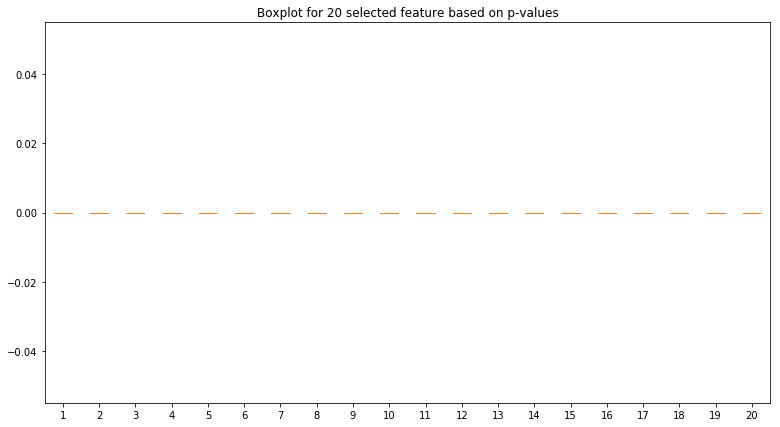

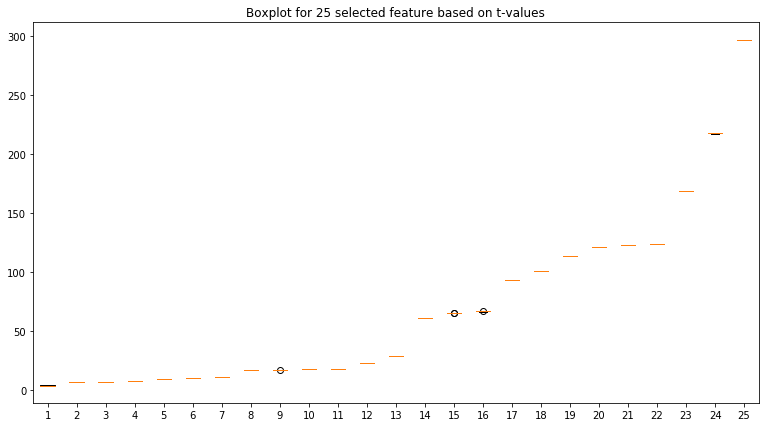

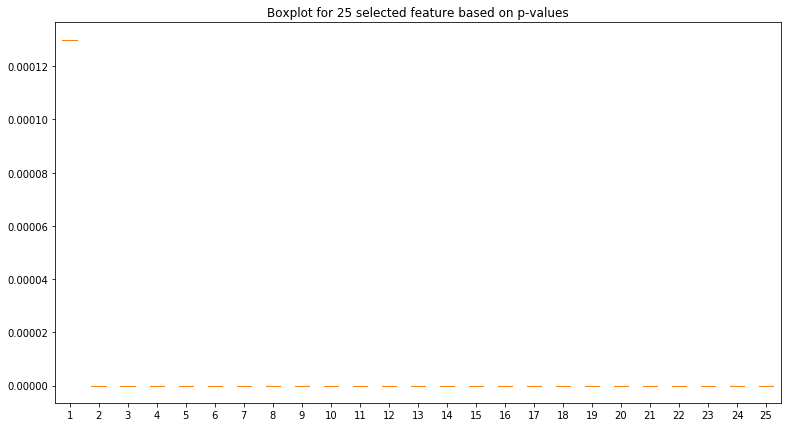

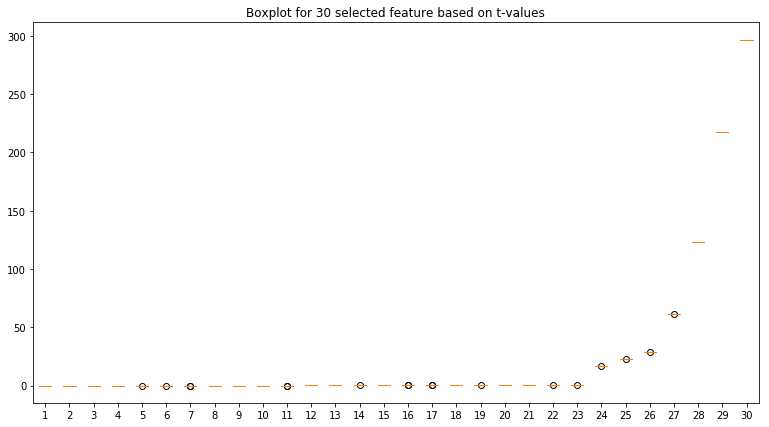

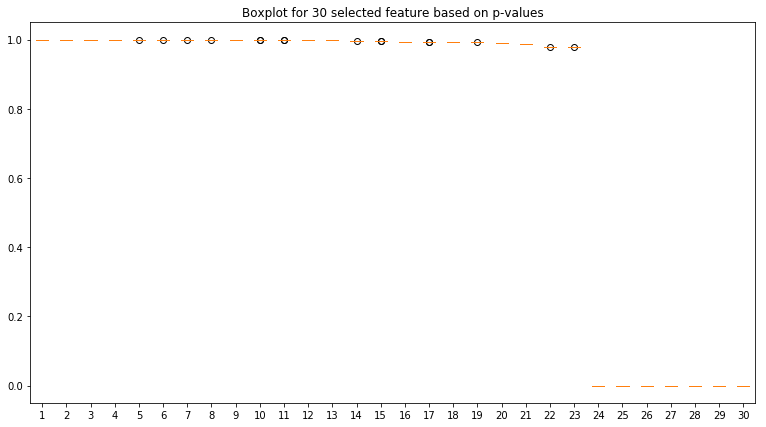

In [103]:
for k in range(len(ks)): #accross all differents number of parameters
    
    t_values_mean_step_i = []
    p_values_step_i = []
    
    for i in range(len(p_values_k[k][0])):          #accross all features gives the number of features of the k-st iteration
        tmp_t_values = []
        tmp_p_values = []

        for j in range(5): #number of repeats 
            tmp_t_values.append(p_values_k[k][j].iloc[i].t_values)
            tmp_p_values.append(p_values_k[k][j].iloc[i].Probability)
            
        t_values_mean_step_i.append(tmp_t_values)
        p_values_step_i.append(tmp_p_values)
            
    plt.boxplot(t_values_mean_step_i)
    plt.title('Boxplot for ' + str(ks[k]) + ' selected feature based on t-values')
    plt.show()
    
    plt.boxplot(p_values_step_i)
    plt.title('Boxplot for ' + str(ks[k]) + ' selected feature based on p-values')
    plt.show()

**COMMENT** : 
In these plots, we were able to show the median and spread of the predicted p- and t-values through boxplots. We see that the t-values of the different parameters does not change much across the 5 fold cross-validation. The same observation is true for the p.values. We decided to show both statistics since we selected features based on the t-values since the data seemed to be more meaning full for our purpose than the p-values (which were identical for several parameters and therefore it was easier to select the features based on the t-values). Nevertheless, in the litterature it is more usual to select data based on the p-values therefore we decided to show it also. 

### Task D 

Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". 

#### Task D.1 : Train a random forest
During this task, we trained a random forest. 5-fold cross-validation on the training set was used to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth".

In [104]:
# Fitting Random forest classification classifier to the opt Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy') 
classifier.fit(standart_80, y_80) 

# predicting the test set result
y_pred_Rforest = classifier.predict(standart_20)

classifier.score(standart_20, y_20)

0.8164138712316698

#### Task D.2 :  5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth"
We started with computing the accuracy, recall, precision and F1 score for all 5 cross-validations and all the different depth and number of estimator values. We decide to use show the mean score accross the 5 CV for each pair of features. 

In [108]:
max_depth = np.linspace(1, 50, 50).astype(int)
n_estimators = np.linspace(1, 50, 50).astype(int)

accuracy_depth = []
precision_depth = []
f1_score_depth = []
recall_depth = []
    
for depth in max_depth: 
    accuracy_estimator = []
    precision_estimator = []
    f1_score_estimator = []
    recall_estimator = []

    for estimator in n_estimators:
        
        accuracy_cv = []
        precision_cv = []
        f1_score_cv = []
        recall_cv = []
        
        for i in range(5): 
            classifier = RandomForestClassifier(criterion = 'entropy', max_depth = depth, n_estimators = estimator)
            classifier.fit(standart_80, y_80)

            y_pred_Rforest = classifier.predict(standart_20)
            confusion_matrix = compute_confusion_matrix(y_20, y_pred_Rforest)

            accuracy_cv.append(compute_accuracy(confusion_matrix))
            precision_cv.append(compute_precision(confusion_matrix))
            f1_score_cv.append(compute_f1(confusion_matrix))
            recall_cv.append(compute_recall(confusion_matrix))
            
        accuracy_estimator.append(np.mean(accuracy_cv))
        precision_estimator.append(np.mean(precision_cv))
        f1_score_estimator.append(np.mean(f1_score_cv))
        recall_estimator.append(np.mean(recall_cv))
            
    accuracy_depth.append(accuracy_estimator)
    precision_depth.append(precision_estimator)
    f1_score_depth.append(f1_score_estimator)
    recall_depth.append(recall_estimator)

In [109]:
import pickle
with open('accuracy_depth.pkl', 'wb') as f:
    pickle.dump(accuracy_depth, f)
    
with open('precision_depth.pkl', 'wb') as f:
    pickle.dump(precision_depth, f)
    
with open('f1_score_depth.pkl', 'wb') as f:
    pickle.dump(f1_score_depth, f)
    
with open('recall_depth.pkl', 'wb') as f:
    pickle.dump(recall_depth, f)

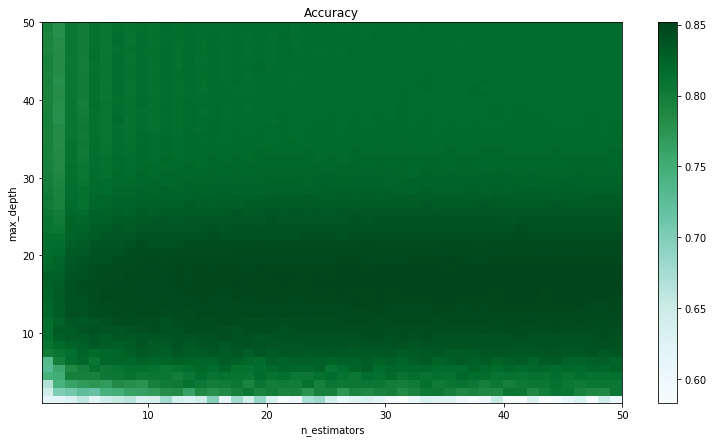

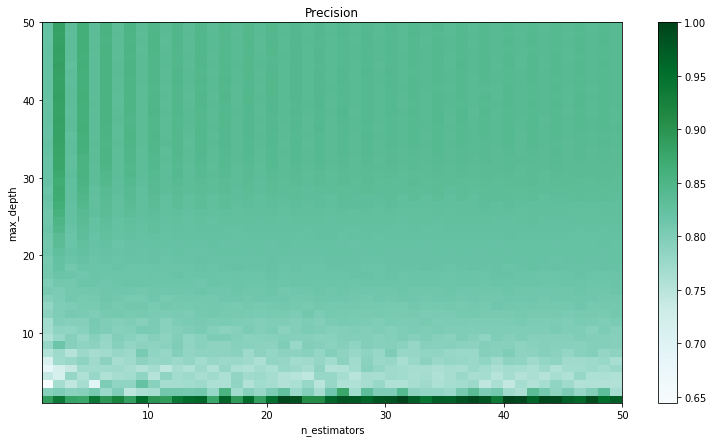

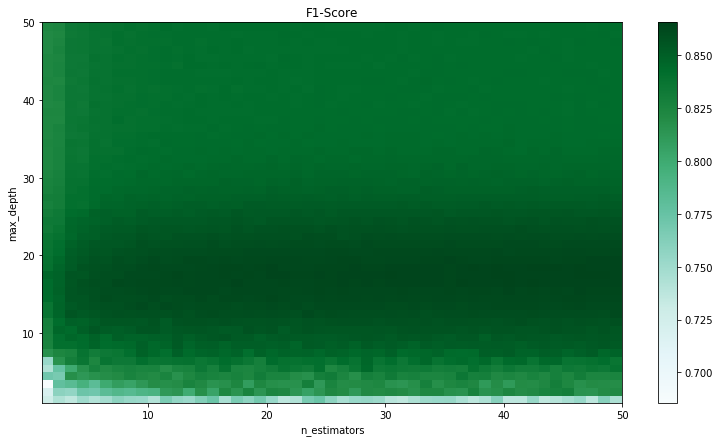

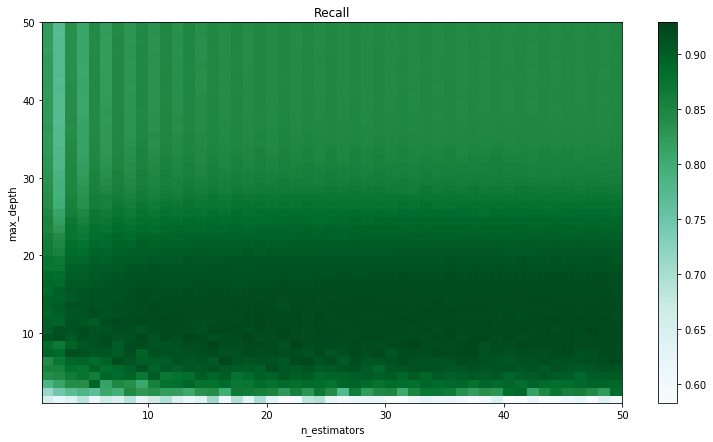

In [110]:
#plt.contour(n_estimators, max_depth, accuracy_depth, 30, linewidths = 0.5, cmap='BuGn')
plt.pcolormesh(n_estimators, max_depth, accuracy_depth, cmap = plt.get_cmap('BuGn'))
plt.colorbar()
plt.title('Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

plt.pcolormesh(n_estimators, max_depth, precision_depth, cmap = plt.get_cmap('BuGn'))
plt.colorbar()
plt.title('Precision')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

plt.pcolormesh(n_estimators, max_depth, f1_score_depth, cmap = plt.get_cmap('BuGn'))
plt.colorbar()
plt.title('F1-Score')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

plt.pcolormesh(n_estimators, max_depth, recall_depth, cmap = plt.get_cmap('BuGn'))
plt.colorbar()
plt.title('Recall')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

**COMMENT** : We decided to work with all the features provided since it was not mandatory to work with the feature selection implemented in part 2.C. As mentionned ealier we decided to focus more on the recall value than on the other factors since it is more important to have a very low number of false negatives. In these plots in 2D, the axes represented the values of a feature (either max_depth or n_estimators) that we varies and the intensity of the green is the values of accuracy, recall, f1-score and precision. Finally, we selected the features that maximized the values of the recall and we used these paramters for the other questions of the task. 

#### Find the paramters that maximise the recall value

In [113]:
column = np.argmax(recall_depth)%50
row = int((np.argmax(recall_depth)-column)/50)

#  rows = depth and column = column
print('The best parameters are : max_depth = ', max_depth[row], 'and the n_estimators = ', n_estimators[column])
print('Accuracy = ', accuracy_depth[row][column])
print('Precision = ', precision_depth[row][column])
print('Recall = ', recall_depth[row][column])
print('F1 score = ', f1_score_depth[row][column])

The best parameters are : max_depth =  8 and the n_estimators =  22
Accuracy =  0.8357857637359178
Precision =  0.7783917970858067
Recall =  0.9285208908543996
F1 score =  0.8467613480914059


**COMMENT** 
As we can see from the results. It was possible to get results of high quality regading all the different scoring methods that we have. 

### For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression.

In [114]:
classifier = RandomForestClassifier(n_estimators = n_estimators[column], max_depth = max_depth[row],criterion = 'entropy') 
classifier.fit(standart_80, y_80) 

# predicting the test set result
y_pred_Rforest = classifier.predict(standart_20)

#### Compute the Classification Score 

In [115]:
classifier.score(standart_20, y_20)

0.8391339920699855

#### Confusion matrix & Scores 

In [116]:
compute_confusion_matrix(y_20, y_pred_Rforest)

array([[7316., 1949.],
       [ 607., 6017.]])

In [117]:
print('As mentionned above the scores are : \n Accuracy = ', accuracy_depth[row][column])
print('Precision = ', precision_depth[row][column])
print('Recall = ', recall_depth[row][column])
print('F1 score = ', f1_score_depth[row][column])

As mentionned above the scores are : 
 Accuracy =  0.8357857637359178
Precision =  0.7783917970858067
Recall =  0.9285208908543996
F1 score =  0.8467613480914059


#### Compare the classifier's performance between each other

 Interpret the results.

While comparing both classifiers, one could see that the Random Forest classifiers perform the best for this task. The best score that we were able to get with the logistic classifier was around 0.82 and only 0.76 for the threshold that minimized the amount of False negative values. The random Forest classifier was able to reach an accuracy of about 0.84 with the parameters that minimized the number of false negatives. This is 6% better than the logistic classifier. This is not that surprising considering that random forest classification remains the state of the art in many domains. However, it would have been interesting to implement a neural network in order to assess if one could increase the recall and the precision score even more in order to same more of these homeless animals ...